In [1]:
%matplotlib inline

import random
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from scipy.stats import gamma
import pystan 
import pandas as pd
import seaborn as sns
import math
import statistics as st
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import warnings
import ipywidgets 
from tqdm.notebook import tqdm
from scipy.stats import beta

In [2]:
sm_retention = pickle.load(open('stan_model_Retention_time.pkl', 'rb'))
fit_nuts_Solid_retention = pickle.load(open('fit_nuts_Solid_Retention_time.pkl', 'rb'))
fit_nuts_Liquid_retention = pickle.load(open('fit_nuts_Liquid_Retention_time.pkl', 'rb'))
fit_nuts_Milk_retention = pickle.load(open('fit_nuts_Milk_Retention_time.pkl', 'rb'))
samples_Liquid_retention = fit_nuts_Liquid_retention.extract(permuted=True)
samples_Solid_retention = fit_nuts_Solid_retention.extract(permuted=True)
samples_Milk_retention = fit_nuts_Milk_retention.extract(permuted=True)

In [3]:
sm1 = pickle.load(open('../../Cell Invasion/new stan model.pkl', 'rb'))

fit_27 = pickle.load(open('../../Cell Invasion/fit_27.pkl', 'rb'))
fit_42 = pickle.load(open('../../Cell Invasion/fit_42.pkl', 'rb'))
fit_48 = pickle.load(open('../../Cell Invasion/fit_48.pkl', 'rb'))

samples_27 = fit_27.extract(permuted=True)
samples_42 = fit_42.extract(permuted=True)
samples_48 = fit_48.extract(permuted=True)

In [4]:
sm_Colonic_filling = pickle.load(open('stan_model_Colonic_filling.pkl', 'rb'))
fit_nuts_Colonic_filling = pickle.load(open('fit_nuts_Colonic_filling.pkl', 'rb'))
samples_Colonic_filling = fit_nuts_Colonic_filling.extract(permuted=True)

In [5]:
def rk4 ( y, t, h, f ):
    k1 = h * f( y, t )
    k2 = h * f( y + k1/2, t + h/2 )
    k3 = h * f( y + k2/2, t + h/2 )
    k4 = h * f( y + k3, t + h )
    return  y + ( k1 + 2*k2 + 2*k3 + k4 )/6, t + h

Progress:   0%|          | 0/10000 [00:00<?, ?it/s]

Progress:   0%|          | 0/301 [00:00<?, ?it/s]

Progress:   0%|          | 0/10000 [00:00<?, ?it/s]

Progress:   0%|          | 0/301 [00:00<?, ?it/s]

Progress:   0%|          | 0/10000 [00:00<?, ?it/s]

Progress:   0%|          | 0/301 [00:00<?, ?it/s]

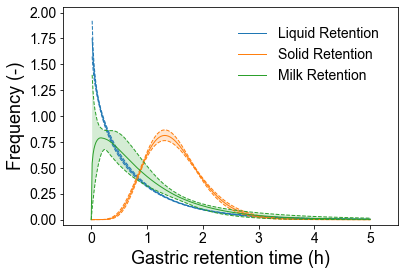

In [6]:
plt.rcParams["font.family"] = "Arial"
Palette=sns.color_palette(n_colors = 3)
plt.xticks(size=14)
plt.yticks(size=14)
x =  np.zeros((5*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, 5, 5*60+1)
for i in tqdm(range(len(samples_Liquid_retention["lp__"])),desc='Progress', leave=False):
    alpha = samples_Liquid_retention["alpha"][i]
    beta = samples_Liquid_retention["beta"][i]
    sigma = samples_Liquid_retention["sigma"][i]
    Liquid_retention_time = 60*gamma.pdf(60*x, alpha, loc=0, scale=1./beta)
    if i == 0:
        Liquid_retention_time_list = Liquid_retention_time
    else:
        Liquid_retention_time_list = np.concatenate([Liquid_retention_time_list, Liquid_retention_time], axis = -1) 

Liquid_retention_time_quantile = np.zeros((5*60+1,7), dtype=float)

for j in tqdm(range(5*60+1),desc='Progress', leave=False):
    Liquid_retention_time_quantile[j,:] = np.quantile(Liquid_retention_time_list[j,:],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    
plt.fill_between(x[:,0], Liquid_retention_time_quantile[:,1], Liquid_retention_time_quantile[:,5], facecolor=Palette[0], alpha=0.2)
plt.plot(x[:,0], Liquid_retention_time_quantile[:,1], lw=1, color=Palette[0], linestyle='--')
plt.plot(x[:,0], Liquid_retention_time_quantile[:,5], lw=1, color=Palette[0], linestyle='--')
plt.plot(x[:,0], Liquid_retention_time_quantile[:,3], lw=1, color=Palette[0], label="Liquid Retention")


x =  np.zeros((5*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, 5, 5*60+1)
for i in tqdm(range(len(samples_Solid_retention["lp__"])),desc='Progress', leave=False):
    alpha = samples_Solid_retention["alpha"][i]
    beta = samples_Solid_retention["beta"][i]
    sigma = samples_Solid_retention["sigma"][i]
    Solid_retention_time = 60*gamma.pdf(60*x, alpha, loc=0, scale=1./beta)
    if i == 0:
        Solid_retention_time_list = Solid_retention_time
    else:
        Solid_retention_time_list = np.concatenate([Solid_retention_time_list, Solid_retention_time], axis = -1) 

Solid_retention_time_quantile = np.zeros((5*60+1,7), dtype=float)

for j in tqdm(range(5*60+1),desc='Progress', leave=False):
    Solid_retention_time_quantile[j,:] = np.quantile(Solid_retention_time_list[j,:],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    
plt.fill_between(x[:,0], Solid_retention_time_quantile[:,1], Solid_retention_time_quantile[:,5], facecolor=Palette[1], alpha=0.2)
plt.plot(x[:,0], Solid_retention_time_quantile[:,1], lw=1, color=Palette[1], linestyle='--')
plt.plot(x[:,0], Solid_retention_time_quantile[:,5], lw=1, color=Palette[1], linestyle='--')
plt.plot(x[:,0], Solid_retention_time_quantile[:,3], lw=1, color=Palette[1], label="Solid Retention")


x =  np.zeros((5*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, 5, 5*60+1)
for i in tqdm(range(len(samples_Milk_retention["lp__"])),desc='Progress', leave=False):
    alpha = samples_Milk_retention["alpha"][i]
    beta = samples_Milk_retention["beta"][i]
    sigma = samples_Milk_retention["sigma"][i]
    Milk_retention_time = 60*gamma.pdf(60*x, alpha, loc=0, scale=1./beta)
    if i == 0:
        Milk_retention_time_list = Milk_retention_time
    else:
        Milk_retention_time_list = np.concatenate([Milk_retention_time_list, Milk_retention_time], axis = -1) 

Milk_retention_time_quantile = np.zeros((5*60+1,7), dtype=float)

for j in tqdm(range(5*60+1),desc='Progress', leave=False):
    Milk_retention_time_quantile[j,:] = np.quantile(Milk_retention_time_list[j,:],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    
plt.fill_between(x[:,0], Milk_retention_time_quantile[:,1], Milk_retention_time_quantile[:,5], facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], Milk_retention_time_quantile[:,1], lw=1, color=Palette[2], linestyle='--')
plt.plot(x[:,0], Milk_retention_time_quantile[:,5], lw=1, color=Palette[2], linestyle='--')
plt.plot(x[:,0], Milk_retention_time_quantile[:,3], lw=1, color=Palette[2], label="Milk Retention")


plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Gastric retention time (h)",size=18,fontname="Arial")
plt.legend(loc='upper right', borderaxespad=1, fontsize=14, frameon = False)
plt.xlim(-0.5, 5.5)
plt.ylim(-0.05, 2.05)
plt.show()

In [7]:
Tmax = 15
x =  np.zeros((Tmax*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, Tmax, Tmax*60+1)

Progress:   0%|          | 0/10000 [00:00<?, ?it/s]

Progress:   0%|          | 0/901 [00:00<?, ?it/s]

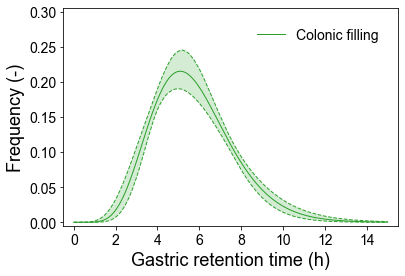

In [8]:
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)
for i in tqdm(range(len(samples_Colonic_filling["lp__"])),desc='Progress', leave=False):
    alpha = samples_Colonic_filling["alpha"][i]
    beta = samples_Colonic_filling["beta"][i]
    Colonic_filling_time = 60*gamma.pdf(60*x, alpha, loc=0, scale=1./beta)
    if i == 0:
        Colonic_filling_time_list = Colonic_filling_time
    else:
        Colonic_filling_time_list = np.concatenate([Colonic_filling_time_list, Colonic_filling_time], axis = -1) 

Colonic_filling_time_quantile = np.zeros((len(x),7), dtype=float)

for j in tqdm(range(len(x)),desc='Progress', leave=False):
    Colonic_filling_time_quantile[j,:] = np.quantile(Colonic_filling_time_list[j,:],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])

plt.fill_between(x[:,0], Colonic_filling_time_quantile[:,1], Colonic_filling_time_quantile[:,5], facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], Colonic_filling_time_quantile[:,1], lw=1, color=Palette[2], linestyle='--')
plt.plot(x[:,0], Colonic_filling_time_quantile[:,5], lw=1, color=Palette[2], linestyle='--')
plt.plot(x[:,0], Colonic_filling_time_quantile[:,3], lw=1, color=Palette[2], label="Colonic filling")

plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Gastric retention time (h)",size=18,fontname="Arial")
plt.legend(loc='upper right', borderaxespad=1, fontsize=14, frameon = False)
plt.xlim(-0.5, 15.5)
plt.ylim(-0.005, 0.305)
plt.show()

In [9]:
# Loading Baysian model of gastric reduction
sm_GR_between_strain = pickle.load(open('between-strain model.pkl', 'rb'))
fit_nuts_between_strain = pickle.load(open('fit_nuts_between_strain.pkl', 'rb'))
samples_between_strain = fit_nuts_between_strain.extract(permuted=True)

In [10]:
# Import pH change with individual person variability from .pickle
sm_pH_change = pickle.load(open('Stan model for pH change.pkl', 'rb'))
fit_nuts_pH_change_younger = pickle.load(open('fit_nuts_pH_change_younger.pkl', 'rb'))
fit_nuts_pH_change_elder = pickle.load(open('fit_nuts_pH_change_elder.pkl', 'rb'))
samples_pH_change_younger = fit_nuts_pH_change_younger.extract(permuted=True)
samples_pH_change_elder = fit_nuts_pH_change_elder.extract(permuted=True)

In [11]:
#Repetition of simulation
rep_eat = 1000

# Color Difinition
Palette=sns.color_palette(n_colors = rep_eat)

#Max Time (h) 
Tmax = 15

#Difinition of time-array (h) 
x =  np.zeros((Tmax*60*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, Tmax, Tmax*60*60+1)

##### Definition of Gastric passage log counts
logSg0_list = []
logSg0 = np.zeros((len(x), 1), dtype=float)
t_star = []

logSg0_27_list = []
logSg0_27 = np.zeros((len(x), 1), dtype=float)
t_star_27 = []

logSg0_42_list = []
logSg0_42 = np.zeros((len(x), 1), dtype=float)
t_star_42 = []

logSg0_48_list = []
logSg0_48 = np.zeros((len(x), 1), dtype=float)
t_star_48 = []

rcn_between_strain_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_27_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_42_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_48_list = np.zeros((rep_eat, 1), dtype=int)
rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)

rcn_pH_list = np.zeros((rep_eat, 1), dtype=int)
pH_Lowest_list = np.zeros((rep_eat, 1), dtype=float)
pH_A_list = np.zeros((rep_eat, 1), dtype=float)
pH_k_list = np.zeros((rep_eat, 1), dtype=float)
pH_sigma_list = np.zeros((rep_eat, 1), dtype=float)
pH_list = np.zeros((len(x), rep_eat), dtype=float)

reduction_a_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_27_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_42_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_48_list = np.zeros((rep_eat, 1), dtype=float)

for i in tqdm(range(rep_eat), desc = 'Progress', leave = False):
    
    rcn_pH = random.choice(range(len(samples_pH_change_younger["lp__"])))
    rcn_pH_list[i, 0] = rcn_pH
    Lowest = samples_pH_change_younger["Lowest"][rcn_pH]
    A = samples_pH_change_younger["A"][rcn_pH]
    k = samples_pH_change_younger["k"][rcn_pH]
    sigma_pH = samples_pH_change_younger["sigma"][rcn_pH]
    
    pH_Lowest_list[i, 0] = samples_pH_change_younger["Lowest"][rcn_pH]
    pH_A_list[i, 0] = samples_pH_change_younger["A"][rcn_pH]
    pH_k_list[i, 0] = samples_pH_change_younger["k"][rcn_pH]
    pH_sigma_list[i, 0] = samples_pH_change_younger["sigma"][rcn_pH]
    
    for t in range(len(x)):
        pH_list[t, i] = np.random.normal(Lowest+A*np.exp(-k*x[t, 0]*3600), sigma_pH)

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
len(pH_list[:,0])

54001

In [13]:
len(pH_list[0,:])

1000

In [14]:


##### Simulation of Gastric passage log counts
warnings.simplefilter('ignore', RuntimeWarning)
for i in tqdm(range(rep_eat), desc = 'Progress', leave = False):
    

    rcn_between_strain = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_between_strain_list[i, 0] = rcn_between_strain
    abef0 = samples_between_strain["abef0"][rcn_between_strain]
    cov = samples_between_strain["cov"][rcn_between_strain]
    abef = np.random.multivariate_normal(abef0, cov, size = 1)[0]
    a = abef[0]
    b = abef[1]
    e = abef[2]
    f = abef[3]
    
    reduction_a_list[i,0] = a
    reduction_b_list[i,0] = b
    reduction_e_list[i,0] = e
    reduction_f_list[i,0] = f
    
    rcn_each_strain_27 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_27_list[i, 0] = rcn_each_strain_27
    
    a_27 = samples_between_strain["a"][rcn_between_strain, 2]
    b_27 = samples_between_strain["b"][rcn_between_strain, 2]
    e_27 = samples_between_strain["e"][rcn_between_strain, 2]
    f_27 = samples_between_strain["f"][rcn_between_strain, 2]
    
    reduction_a_27_list[i,0] = a
    reduction_b_27_list[i,0] = b
    reduction_e_27_list[i,0] = e
    reduction_f_27_list[i,0] = f
    
    rcn_each_strain_42 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_42_list[i, 0] = rcn_each_strain_42
    
    a_42 = samples_between_strain["a"][rcn_between_strain, 5]
    b_42 = samples_between_strain["b"][rcn_between_strain, 5]
    e_42 = samples_between_strain["e"][rcn_between_strain, 5]
    f_42 = samples_between_strain["f"][rcn_between_strain, 5]
    
    reduction_a_42_list[i,0] = a
    reduction_b_42_list[i,0] = b
    reduction_e_42_list[i,0] = e
    reduction_f_42_list[i,0] = f
    
    
    rcn_each_strain_48 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_48_list[i, 0] = rcn_each_strain_48
    
    a_48 = samples_between_strain["a"][rcn_between_strain, 8]
    b_48 =  samples_between_strain["b"][rcn_between_strain, 8]
    e_48 =  samples_between_strain["e"][rcn_between_strain, 8]
    f_48 =  samples_between_strain["f"][rcn_between_strain, 8]
    
    reduction_a_48_list[i,0] = a
    reduction_b_48_list[i,0] = b
    reduction_e_48_list[i,0] = e
    reduction_f_48_list[i,0] = f
    
    
    
    # Predict log reduction from between strain model
    for t in range(len(x)):
        if t==0:
            logSg0[t] = 0
            logSg0_27[t] = 0
            logSg0_42[t] = 0
            logSg0_48[t] = 0
            pH_before = pH_list[t, i]
        else :
            pH_next = pH_list[t, i]
            pH = (pH_before + pH_next)/2
            pH_before = pH_next
            
            logd = (a*pH+b)
            logp = e*pH+f
            logdp = [logd, logp]
            
            logd_27 = (a_27*pH+b_27)
            logp_27 = e_27*pH+f_27
            logdp_27 = [logd_27, logp_27]
            
            logd_42 = (a_42*pH+b_42)
            logp_42 = e_42*pH+f_42
            logdp_42 = [logd_42, logp_42]
            
            logd_48 = (a_48*pH+b_48)
            logp_48 = e_48*pH+f_48
            logdp_48 = [logd_48, logp_48]
            
            d = np.exp(logdp[0])/60
            p = np.exp(logdp[1])
            t_star =  d*(-(logSg0[t-1]))**(1/p)
            logSg0[t] = -((t_star+(x[t]-x[t-1]))/d)**p
            
            d_27 = np.exp(logdp_27[0])/60
            p_27 = np.exp(logdp_27[1])
            t_star_27 =  d_27*(-(logSg0_27[t-1]))**(1/p_27)
            logSg0_27[t] = -((t_star_27+(x[t]-x[t-1]))/d_27)**p_27
            
            d_42 = np.exp(logdp_42[0])/60
            p_42 = np.exp(logdp_42[1])
            t_star_42 =  d_42*(-(logSg0_42[t-1]))**(1/p_42)
            logSg0_42[t] = -((t_star_42+(x[t]-x[t-1]))/d_42)**p_42
            
            d_48 = np.exp(logdp_48[0])/60
            p_48 = np.exp(logdp_48[1])
            t_star_48 =  d_48*(-(logSg0_48[t-1]))**(1/p_48)
            logSg0_48[t] = -((t_star_48+(x[t]-x[t-1]))/d_48)**p_48
    
    if i == 0:
        logSg0_list = logSg0
        logSg0_27_list = logSg0_27
        logSg0_42_list = logSg0_42
        logSg0_48_list = logSg0_48
    else:
        logSg0_list = np.concatenate([logSg0_list, logSg0], axis = -1) 
        logSg0_27_list = np.concatenate([logSg0_27_list, logSg0_27], axis = -1) 
        logSg0_42_list = np.concatenate([logSg0_42_list, logSg0_42], axis = -1) 
        logSg0_48_list = np.concatenate([logSg0_48_list, logSg0_48], axis = -1) 

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
x =  np.zeros((Tmax*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, Tmax, Tmax*60+1)
logSg0_min = np.zeros((len(x), len(logSg0_list[0,:])), dtype=float)
logSg0_27_min = np.zeros((len(x), len(logSg0_27_list[0,:])), dtype=float)
logSg0_42_min = np.zeros((len(x), len(logSg0_42_list[0,:])), dtype=float)
logSg0_48_min = np.zeros((len(x), len(logSg0_48_list[0,:])), dtype=float)

for i in range(len(x)):
    logSg0_min[i,:] = logSg0_list[i*60,:]
    logSg0_27_min[i,:] = logSg0_27_list[i*60,:]
    logSg0_42_min[i,:] = logSg0_42_list[i*60,:]
    logSg0_48_min[i,:] = logSg0_48_list[i*60,:]

logSg0_list=logSg0_min
logSg0_min=0
logSg0_27_list=logSg0_27_min
logSg0_27_min=0
logSg0_42_list=logSg0_42_min
logSg0_42_min=0
logSg0_48_list=logSg0_48_min
logSg0_48_min=0

In [16]:
logSg0_quantile = np.zeros((len(logSg0_list[:,0]), 3), dtype=float)
logSg0_27_quantile = np.zeros((len(logSg0_27_list[:,0]), 3), dtype=float)
logSg0_42_quantile = np.zeros((len(logSg0_42_list[:,0]), 3), dtype=float)
logSg0_48_quantile = np.zeros((len(logSg0_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(logSg0_list[:,0])),desc='Progress', leave=False):
    logSg0_quantile[n,:] =  np.quantile(logSg0_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_27_quantile[n,:] =  np.quantile(logSg0_27_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_42_quantile[n,:] =  np.quantile(logSg0_42_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_48_quantile[n,:] =  np.quantile(logSg0_48_list[n,:],[ 0.05, 0.5, 0.95])

Progress:   0%|          | 0/901 [00:00<?, ?it/s]

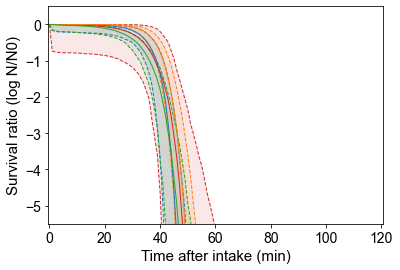

In [17]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0]*60, logSg0_quantile[:,0], logSg0_quantile[:,2], facecolor=Palette[3], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_quantile[:,2], lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0]*60, logSg0_quantile[:,0], lw=1, color=Palette[3],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_27_quantile[:,0], logSg0_27_quantile[:,2], facecolor=Palette[0], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_27_quantile[:,2], lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0]*60, logSg0_27_quantile[:,0], lw=1, color=Palette[0],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_42_quantile[:,0], logSg0_42_quantile[:,2], facecolor=Palette[1], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_42_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0]*60, logSg0_42_quantile[:,0], lw=1, color=Palette[1],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_48_quantile[:,0], logSg0_48_quantile[:,2], facecolor=Palette[2], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_48_quantile[:,2], lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0]*60, logSg0_48_quantile[:,0], lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0]*60, logSg0_quantile[:,1], lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_27_quantile[:,1], lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_42_quantile[:,1], lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_48_quantile[:,1], lw=1, color=Palette[2], label="Survival ratio")

plt.ylabel("Survival ratio (log N/N0)", size=15, fontname="Arial")
plt.xlabel("Time after intake (min)",size=15,fontname="Arial")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(-0.5, 120.5)
plt.ylim(-5.5, 0.5)
plt.show()

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

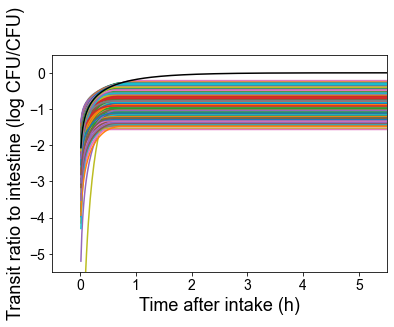

In [23]:
Ni_list = []
Ni_27_list = []
Ni_42_list = []
Ni_48_list = []

plt.rcParams["font.family"] = "Arial"

rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)

for q in tqdm(range(rep_eat),desc='Progress', leave=False):
    
    Ni = np.zeros((len(x), 1), dtype=float)
    dNi = []
    Ni_t = 0
    Ni_27 = np.zeros((len(x), 1), dtype=float)
    dNi_27 = []
    Ni_27_t = 0
    Ni_42 = np.zeros((len(x), 1), dtype=float)
    dNi_42 = []
    Ni_42_t = 0
    Ni_48 = np.zeros((len(x), 1), dtype=float)
    dNi_48 = []
    Ni_48_t = 0
    
    Total = np.zeros((len(x), 1), dtype=float)
    dTotal = []
    Total_t = 0
    
    logSg_using = logSg0_list[:, q]
    logSg_27_using = logSg0_27_list[:, q]
    logSg_42_using = logSg0_42_list[:, q]
    logSg_48_using = logSg0_48_list[:, q]
    
    rcn_gastric_retention = random.choice(range(len(samples_Milk_retention["alpha"])))
    rcn_gastric_retention_list[q, 0] = rcn_gastric_retention
    alpha = samples_Milk_retention["alpha"][rcn_gastric_retention]
    beta = samples_Milk_retention["beta"][rcn_gastric_retention]
    
    
    
    for i in range(len(x)):
        if i == 0:
            Ni[i, 0] = 0
            Ni_27[i, 0] = 0
            Ni_42[i, 0] = 0
            Ni_48[i, 0] = 0
        else:
            Sg = 10**logSg_using[i]
            Sg_27 = 10**logSg_27_using[i]
            Sg_42 = 10**logSg_42_using[i]
            Sg_48 = 10**logSg_48_using[i]
        
            dNi = Sg*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_t = Ni_t + dNi
            Ni[i, 0] = Ni_t
        
            dNi_27 = Sg_27*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_27_t = Ni_27_t + dNi_27
            Ni_27[i, 0] = Ni_27_t
        
            dNi_42 = Sg_42*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_42_t = Ni_42_t + dNi_42
            Ni_42[i, 0] = Ni_42_t

            dNi_48 = Sg_48*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_48_t = Ni_48_t + dNi_48
            Ni_48[i, 0] = Ni_48_t

            dTotal = gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Total_t = Total_t + dTotal
            Total[i, 0] = Total_t

    plt.plot(x[:,0], np.log10(Ni[:,0]), marker="", color=Palette[q])

    
    if q == 0:
        Ni_list = Ni
        Ni_27_list = Ni_27
        Ni_42_list = Ni_42
        Ni_48_list = Ni_48
    else:
        Ni_list = np.concatenate([Ni_list, Ni], axis = -1) 
        Ni_27_list = np.concatenate([Ni_27_list, Ni_27], axis = -1) 
        Ni_42_list = np.concatenate([Ni_42_list, Ni_42], axis = -1) 
        Ni_48_list = np.concatenate([Ni_48_list, Ni_48], axis = -1) 
    
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)

plt.plot(x[:,0], np.log10(Total[:,0]), marker="", color='black')

plt.ylabel("Transit ratio to intestine (log CFU/CFU)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.show()

In [24]:
with open('Ni_Milk_younger.pkl', 'wb') as f:

    pickle.dump(Ni_list, f)

In [25]:
Ni_quantile = np.zeros((len(Ni_list[:,0]), 3), dtype=float)
Ni_27_quantile = np.zeros((len(Ni_27_list[:,0]), 3), dtype=float)
Ni_42_quantile = np.zeros((len(Ni_42_list[:,0]), 3), dtype=float)
Ni_48_quantile = np.zeros((len(Ni_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(Ni_list[:,0])),desc='Progress', leave=False):
    Ni_quantile[n,:] =  np.quantile(Ni_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_27_quantile[n,:] =  np.quantile(Ni_27_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_42_quantile[n,:] =  np.quantile(Ni_42_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_48_quantile[n,:] =  np.quantile(Ni_48_list[n,:],[ 0.05, 0.5, 0.95])

Progress:   0%|          | 0/901 [00:00<?, ?it/s]

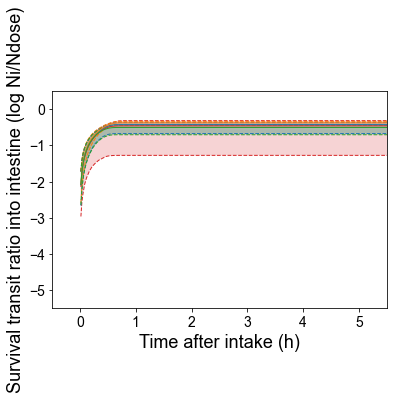

In [26]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0], np.log10(Ni_quantile[:,0]), np.log10(Ni_quantile[:,2]), facecolor=Palette[3], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_27_quantile[:,0]), np.log10(Ni_27_quantile[:,2]), facecolor=Palette[0], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_42_quantile[:,0]), np.log10(Ni_42_quantile[:,2]), facecolor=Palette[1], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_48_quantile[:,0]), np.log10(Ni_48_quantile[:,2]), facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], np.log10(Ni_quantile[:,2]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,2]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,2]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,2]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_quantile[:,0]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,0]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,0]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,0]), lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0], np.log10(Ni_quantile[:,1]), lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,1]), lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,1]), lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,1]), lw=1, color=Palette[2], label="Survival ratio")



plt.ylabel("Survival transit ratio into intestine (log Ni/Ndose)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

/opt/anaconda3/envs/Pystan/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


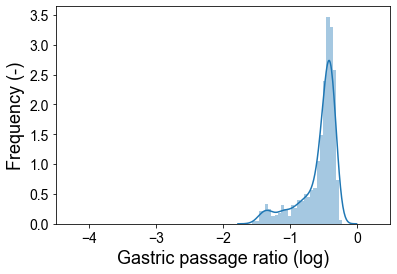

In [27]:
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)
sns.distplot(np.log10(Ni_list)[-1,:])
plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Gastric passage ratio (log)",size=18,fontname="Arial")
plt.xlim(-4.5, 0.5)
plt.show()

In [28]:
V = 319
Ni_min = Ni_list
Ni_27_min = Ni_27_list
Ni_42_min = Ni_42_list
Ni_48_min = Ni_48_list

Nc_min_mean = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

logdose = np.arange(-2, 6+1/10, 1/10, dtype="float")

S = 32*10**4

P_invasion_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_mean = np.zeros((len(logdose),1), dtype=float)
ratio_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_27_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_27_mean = np.zeros((len(logdose),1), dtype=float)
ratio_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_42_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_42_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_42_mean = np.zeros((len(logdose),1), dtype=float)

P_invasion_48_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_48_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_48_mean = np.zeros((len(logdose),1), dtype=float)


In [29]:
for n in tqdm(range(len(logdose)) ,desc='Progress', leave=False):
    warnings.simplefilter('ignore', RuntimeWarning)
    for k in tqdm(range(len(Ni_min[0, :])),desc='Progress', leave=False):

        rcn = random.randrange(len(samples_27["LogNmax"]))
        
        LogNmax_27 = samples_27["LogNmax"][rcn]
        Logmu_27 = samples_27["Logmu"][rcn]
        Nmax_27 = 10**LogNmax_27
        mu_27 = 10**Logmu_27

        LogNmax_42 = samples_42["LogNmax"][rcn]
        Logmu_42 = samples_42["Logmu"][rcn]
        Nmax_42 = 10**LogNmax_42
        mu_42 = 10**Logmu_42

        LogNmax_48 = samples_48["LogNmax"][rcn]
        Logmu_48 = samples_48["Logmu"][rcn]
        Nmax_48 = 10**LogNmax_48
        mu_48 = 10**Logmu_48
        
        Nmax= random.choice([Nmax_27, Nmax_42, Nmax_48])
        mu = random.choice([mu_27, mu_42, mu_48])

        for i in range(len(Ni_min[:, 0])):
        
            Ni = Ni_min[i, k]*10**logdose[n]
            Ni_27 = Ni_27_min[i, k]*10**logdose[n]
            Ni_42 = Ni_42_min[i, k]*10**logdose[n]
            Ni_48 = Ni_48_min[i, k]*10**logdose[n]
            
            T = i/60
            h = 1/60
    
            def ODE_all (y, t):
                return mu_27*(Ni-y)*(S*Nmax - y)/V
    
            def ODE_27 (y, t):
                return mu_27*(Ni_27-y)*(S*Nmax_27 - y)/V

            def ODE_42 (y, t):
                return mu_42*(Ni_42-y)*(S*Nmax_42 - y)/V

            def ODE_48 (y, t):
                return mu_48*(Ni_48-y)*(S*Nmax_48 - y)/V
    
            if i==0:
                Nc_min[i, k] = 0
                Nc_min_27[i, k] = 0
                Nc_min_42[i, k] = 0
                Nc_min_48[i, k] = 0
                
            else:
                
                Nc_min_mean[i, k] = rk4 ( Nc_min_mean[i-1, k], h, T-h, ODE_all)[0]
                Nc_min[i, k] = Nc_min_mean[i, k]
                
                Nc_min_mean_27[i, k] = rk4 ( Nc_min_mean_27[i-1, k], h, T-h, ODE_27)[0]
                Nc_min_27[i, k] = Nc_min_mean_27[i, k]
        
                Nc_min_mean_42[i, k] = rk4 ( Nc_min_mean_42[i-1, k], h, T-h, ODE_42)[0]
                Nc_min_42[i, k] = Nc_min_mean_42[i, k]
        
                Nc_min_mean_48[i, k] = rk4 ( Nc_min_mean_48[i-1, k], h, T-h, ODE_48)[0]
                Nc_min_48[i, k] = Nc_min_mean_48[i, k]

        
        rcn = random.choice(range(len(samples_Colonic_filling["alpha"])))
        t = int(round(np.random.gamma(samples_Colonic_filling["alpha"][rcn],
                                        1/samples_Colonic_filling["beta"][rcn])))
        t = np.min((t,len(Ni_min[:, 0])-1))

        ratio = Nc_min[t,k]/10**logdose[n] 
        P_invasion =  1- (1-ratio)**(10**logdose[n])
        P_invasion_mcmc[n,k] = P_invasion

        ratio_27 = Nc_min_27[t,k]/10**logdose[n] 
        P_invasion_27 =  1- (1-ratio_27)**(10**logdose[n])
        P_invasion_27_mcmc[n,k] = P_invasion_27
        
        ratio_42 = Nc_min_42[t,k]/10**logdose[n] 
        P_invasion_42 =  1- (1-ratio_42)**(10**logdose[n])
        P_invasion_42_mcmc[n,k] = P_invasion_42
        
        ratio_48 = Nc_min_48[t,k]/10**logdose[n]    
        P_invasion_48 =  1- (1-ratio_48)**(10**logdose[n])
        P_invasion_48_mcmc[n,k] = P_invasion_48
        
        
    P_invasion_quantile[n,:] =  np.quantile(P_invasion_mcmc[n,:][np.invert(np.isnan(P_invasion_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_mean[n,:] =  np.mean(P_invasion_mcmc[n,:][np.invert(np.isinf(P_invasion_mcmc[n,:])|np.isnan(P_invasion_mcmc[n,:]))])
    
    P_invasion_27_quantile[n,:] =  np.quantile(P_invasion_27_mcmc[n,:][np.invert(np.isnan(P_invasion_27_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_27_mean[n,:] =  np.mean(P_invasion_27_mcmc[n,:][np.invert(np.isinf(P_invasion_27_mcmc[n,:])|np.isnan(P_invasion_27_mcmc[n,:]))])
    
    P_invasion_42_quantile[n,:] =  np.quantile(P_invasion_42_mcmc[n,:][np.invert(np.isnan(P_invasion_42_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_42_mean[n,:] =  np.mean(P_invasion_42_mcmc[n,:][np.invert(np.isinf(P_invasion_42_mcmc[n,:])|np.isnan(P_invasion_42_mcmc[n,:]))])
    
    P_invasion_48_quantile[n,:] =  np.quantile(P_invasion_48_mcmc[n,:][np.invert(np.isnan(P_invasion_48_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_48_mean[n,:] =  np.mean(P_invasion_48_mcmc[n,:][np.invert(np.isinf(P_invasion_48_mcmc[n,:])|np.isnan(P_invasion_48_mcmc[n,:]))])

Progress:   0%|          | 0/81 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

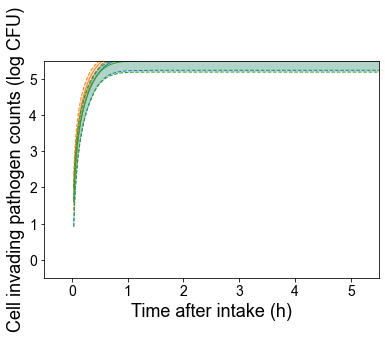

6.000000000000007


In [30]:
Nc_min_27_quantile = np.zeros((len(Ni_list[:,0]), 7), dtype=float)
Nc_min_42_quantile = np.zeros((len(Ni_list[:,0]), 7), dtype=float)
Nc_min_48_quantile = np.zeros((len(Ni_list[:,0]), 7), dtype=float)

for i in range(len(Nc_min_48[:, 0])):
    Nc_min_27_quantile[i, :] =  np.quantile(Nc_min_27[i, :],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    Nc_min_42_quantile[i, :] =  np.quantile(Nc_min_42[i, :],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    Nc_min_48_quantile[i, :] =  np.quantile(Nc_min_48[i, :],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
plt.figure()

plt.fill_between(x[:,0], np.log10(Nc_min_27_quantile[:,1]), np.log10(Nc_min_27_quantile[:,5]), facecolor=Palette[0], alpha=0.2)
plt.plot(x[:,0], np.log10(Nc_min_27_quantile[:,1]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_27_quantile[:,5]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_27_quantile[:,3]), lw=1, color=Palette[0])

plt.fill_between(x[:,0], np.log10(Nc_min_42_quantile[:,1]), np.log10(Nc_min_42_quantile[:,5]), facecolor=Palette[1], alpha=0.2)
plt.plot(x[:,0], np.log10(Nc_min_42_quantile[:,1]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_42_quantile[:,5]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_42_quantile[:,3]), lw=1, color=Palette[1])

plt.fill_between(x[:,0], np.log10(Nc_min_48_quantile[:,1]), np.log10(Nc_min_48_quantile[:,5]), facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], np.log10(Nc_min_48_quantile[:,1]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_48_quantile[:,5]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_48_quantile[:,3]), lw=1, color=Palette[2])

plt.rcParams["font.family"] = "Arial"

plt.ylabel("Cell invading pathogen counts (log CFU)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(-0.5, 5.5)
plt.ylim(-0.5, 5.5)
plt.show()
print(logdose[n])

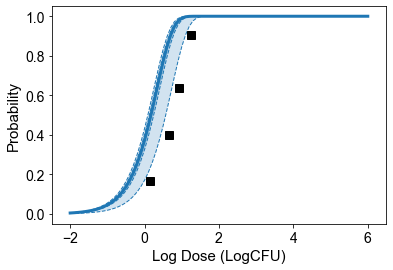

In [31]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_27_quantile[:,1], P_invasion_27_quantile[:,5], 
                 facecolor=Palette[0], alpha=0.2)
plt.plot(logdose, P_invasion_27_quantile[:,1], lw=1, color=Palette[0],linestyle='--')
plt.plot(logdose, P_invasion_27_quantile[:,5], lw=1, color=Palette[0],linestyle='--')


plt.fill_between(logdose, P_invasion_27_quantile[:,2], P_invasion_27_quantile[:,4], 
                 facecolor=Palette[0], alpha=0.2)
plt.plot(logdose, P_invasion_27_quantile[:,2], lw=1, color=Palette[0],linestyle='--')
plt.plot(logdose, P_invasion_27_quantile[:,4], lw=1, color=Palette[0],linestyle='--')


plt.plot(logdose, P_invasion_27_quantile[:,3], lw=3, color=Palette[0], label="RIMD 0366027")


data = pd.read_csv('../../Cell Invasion/Ill probability.csv') 
plt.plot(np.log10(data.Dose),data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

plt.show()

In [32]:
idx = []
for i in range(len(data.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_27_quantile[:,3]) - data.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-np.log10(data.Dose))**2))/len(data.Dose))**0.5

0.5937024457354109

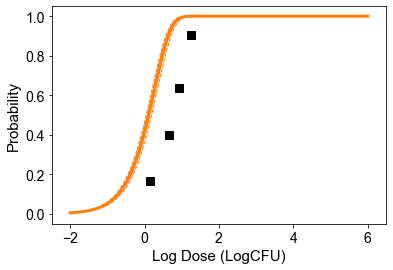

In [33]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_42_quantile[:,1], P_invasion_42_quantile[:,5], facecolor=Palette[1], alpha=0.2)
plt.plot(logdose, P_invasion_42_quantile[:,1], lw=1, color=Palette[1],linestyle='--')
plt.plot(logdose, P_invasion_42_quantile[:,5], lw=1, color=Palette[1],linestyle='--')


plt.fill_between(logdose, P_invasion_42_quantile[:,2], P_invasion_42_quantile[:,4], facecolor=Palette[1], alpha=0.2)
plt.plot(logdose, P_invasion_42_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(logdose, P_invasion_42_quantile[:,4], lw=1, color=Palette[1],linestyle='--')


plt.plot(logdose, P_invasion_42_quantile[:,3], lw=3, color=Palette[1], label="RIMD 0366042")


data = pd.read_csv('../../Cell Invasion/Ill probability.csv') 
plt.plot(np.log10(data.Dose),data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

plt.show()

In [34]:
idx = []
for i in range(len(data.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_42_quantile[:,3]) - data.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-np.log10(data.Dose))**2))/len(data.Dose))**0.5

0.6420488721682557

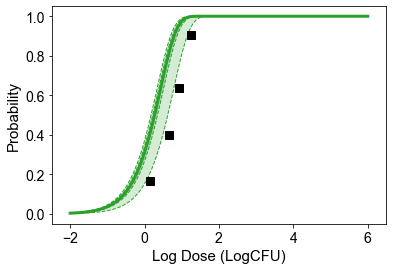

In [35]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_48_quantile[:,1], P_invasion_48_quantile[:,5], facecolor=Palette[2], alpha=0.2)
plt.plot(logdose, P_invasion_48_quantile[:,1], lw=1, color=Palette[2],linestyle='--')
plt.plot(logdose, P_invasion_48_quantile[:,5], lw=1, color=Palette[2],linestyle='--')


plt.fill_between(logdose, P_invasion_48_quantile[:,2], P_invasion_48_quantile[:,4], facecolor=Palette[2], alpha=0.2)
plt.plot(logdose, P_invasion_48_quantile[:,2], lw=1, color=Palette[2],linestyle='--')
plt.plot(logdose, P_invasion_48_quantile[:,4], lw=1, color=Palette[2],linestyle='--')


plt.plot(logdose, P_invasion_48_quantile[:,3], lw=3, color=Palette[2], label="RIMD 0366048")


data = pd.read_csv('../../Cell Invasion/Ill probability.csv') 
plt.plot(np.log10(data.Dose),data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

plt.show()

In [36]:
idx = []
for i in range(len(data.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_48_quantile[:,3]) - data.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-np.log10(data.Dose))**2))/len(data.Dose))**0.5

0.49406021626456453

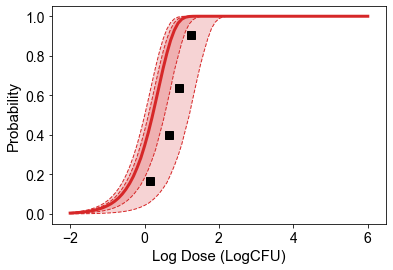

In [37]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_quantile[:,1], P_invasion_quantile[:,5], facecolor=Palette[3], alpha=0.2)
plt.plot(logdose, P_invasion_quantile[:,1], lw=1, color=Palette[3],linestyle='--')
plt.plot(logdose, P_invasion_quantile[:,5], lw=1, color=Palette[3],linestyle='--')


plt.fill_between(logdose, P_invasion_quantile[:,2], P_invasion_quantile[:,4], facecolor=Palette[3], alpha=0.2)
plt.plot(logdose, P_invasion_quantile[:,2], lw=1, color=Palette[3],linestyle='--')
plt.plot(logdose, P_invasion_quantile[:,4], lw=1, color=Palette[3],linestyle='--')


plt.plot(logdose, P_invasion_quantile[:,3], lw=3, color=Palette[3], label="Total of isolations")


data = pd.read_csv('../../Cell Invasion/Ill probability.csv') 
plt.plot(np.log10(data.Dose),data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

plt.show()

In [38]:
idx = []
for i in range(len(data.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - data.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-np.log10(data.Dose))**2))/len(data.Dose))**0.5

0.5420697902260456

In [ ]:
Ni_list = []
Ni_27_list = []
Ni_42_list = []
Ni_48_list = []

plt.rcParams["font.family"] = "Arial"

rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)

for q in tqdm(range(rep_eat),desc='Progress', leave=False):
    
    Ni = np.zeros((len(x), 1), dtype=float)
    dNi = []
    Ni_t = 0
    Ni_27 = np.zeros((len(x), 1), dtype=float)
    dNi_27 = []
    Ni_27_t = 0
    Ni_42 = np.zeros((len(x), 1), dtype=float)
    dNi_42 = []
    Ni_42_t = 0
    Ni_48 = np.zeros((len(x), 1), dtype=float)
    dNi_48 = []
    Ni_48_t = 0
    
    Total = np.zeros((len(x), 1), dtype=float)
    dTotal = []
    Total_t = 0
    
    logSg_using = logSg0_list[:, q]
    logSg_27_using = logSg0_27_list[:, q]
    logSg_42_using = logSg0_42_list[:, q]
    logSg_48_using = logSg0_48_list[:, q]
    
    rcn_gastric_retention = random.choice(range(len(samples_Solid_retention["alpha"])))
    rcn_gastric_retention_list[q, 0] = rcn_gastric_retention
    alpha = samples_Solid_retention["alpha"][rcn_gastric_retention]
    beta = samples_Solid_retention["beta"][rcn_gastric_retention]
    
    
    
    for i in range(len(x)):
        Sg = 10**logSg_using[i]
        Sg_27 = 10**logSg_27_using[i]
        Sg_42 = 10**logSg_42_using[i]
        Sg_48 = 10**logSg_48_using[i]
        
        dNi = Sg*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
        Ni_t = Ni_t + dNi
        Ni[i, 0] = Ni_t
        
        dNi_27 = Sg_27*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
        Ni_27_t = Ni_27_t + dNi_27
        Ni_27[i, 0] = Ni_27_t
        
        dNi_42 = Sg_42*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
        Ni_42_t = Ni_42_t + dNi_42
        Ni_42[i, 0] = Ni_42_t
        
        dNi_48 = Sg_48*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
        Ni_48_t = Ni_48_t + dNi_48
        Ni_48[i, 0] = Ni_48_t
        
        dTotal = gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
        Total_t = Total_t + dTotal
        Total[i, 0] = Total_t

    plt.plot(x[:,0], np.log10(Ni[:,0]), marker="", color=Palette[q])

    
    if q == 0:
        Ni_list = Ni
        Ni_27_list = Ni_27
        Ni_42_list = Ni_42
        Ni_48_list = Ni_48
    else:
        Ni_list = np.concatenate([Ni_list, Ni], axis = -1) 
        Ni_27_list = np.concatenate([Ni_27_list, Ni_27], axis = -1) 
        Ni_42_list = np.concatenate([Ni_42_list, Ni_42], axis = -1) 
        Ni_48_list = np.concatenate([Ni_48_list, Ni_48], axis = -1) 
    
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)

plt.plot(x[:,0], np.log10(Total[:,0]), marker="", color='black')

plt.ylabel("Transit ratio to intestine (log CFU/CFU)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.show()

In [19]:
with open('Ni_Solid_younger.pkl', 'wb') as f:

    pickle.dump(Ni_list, f)

In [20]:
Ni_quantile = np.zeros((len(Ni_list[:,0]), 3), dtype=float)
Ni_27_quantile = np.zeros((len(Ni_27_list[:,0]), 3), dtype=float)
Ni_42_quantile = np.zeros((len(Ni_42_list[:,0]), 3), dtype=float)
Ni_48_quantile = np.zeros((len(Ni_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(Ni_list[:,0])),desc='Progress', leave=False):
    Ni_quantile[n,:] =  np.quantile(Ni_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_27_quantile[n,:] =  np.quantile(Ni_27_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_42_quantile[n,:] =  np.quantile(Ni_42_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_48_quantile[n,:] =  np.quantile(Ni_48_list[n,:],[ 0.05, 0.5, 0.95])

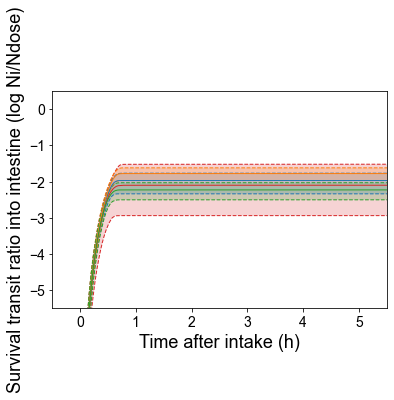

In [21]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0], np.log10(Ni_quantile[:,0]), np.log10(Ni_quantile[:,2]), facecolor=Palette[3], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_27_quantile[:,0]), np.log10(Ni_27_quantile[:,2]), facecolor=Palette[0], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_42_quantile[:,0]), np.log10(Ni_42_quantile[:,2]), facecolor=Palette[1], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_48_quantile[:,0]), np.log10(Ni_48_quantile[:,2]), facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], np.log10(Ni_quantile[:,2]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,2]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,2]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,2]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_quantile[:,0]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,0]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,0]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,0]), lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0], np.log10(Ni_quantile[:,1]), lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,1]), lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,1]), lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,1]), lw=1, color=Palette[2], label="Survival ratio")



plt.ylabel("Survival transit ratio into intestine (log Ni/Ndose)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

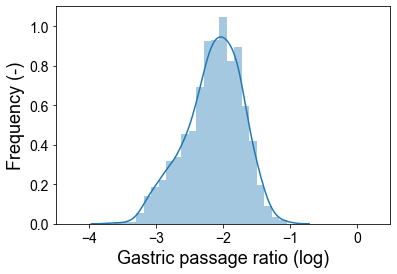

In [22]:
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)
sns.distplot(np.log10(Ni_list)[-1,:])
plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Gastric passage ratio (log)",size=18,fontname="Arial")
plt.xlim(-4.5, 0.5)
plt.show()

In [23]:
V = 319
Ni_min = Ni_list
Ni_27_min = Ni_27_list
Ni_42_min = Ni_42_list
Ni_48_min = Ni_48_list

Nc_min_mean = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

logdose = np.arange(-2, 6+1/10, 1/10, dtype="float")

S = 32*10**4

P_invasion_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_mean = np.zeros((len(logdose),1), dtype=float)
ratio_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_27_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_27_mean = np.zeros((len(logdose),1), dtype=float)
ratio_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_42_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_42_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_42_mean = np.zeros((len(logdose),1), dtype=float)

P_invasion_48_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_48_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_48_mean = np.zeros((len(logdose),1), dtype=float)


In [24]:
for n in tqdm(range(len(logdose)) ,desc='Progress', leave=False):
    warnings.simplefilter('ignore', RuntimeWarning)
    for k in tqdm(range(len(Ni_min[0, :])),desc='Progress', leave=False):

        rcn = random.randrange(len(samples_27["LogNmax"]))
        
        LogNmax_27 = samples_27["LogNmax"][rcn]
        Logmu_27 = samples_27["Logmu"][rcn]
        Nmax_27 = 10**LogNmax_27
        mu_27 = 10**Logmu_27

        LogNmax_42 = samples_42["LogNmax"][rcn]
        Logmu_42 = samples_42["Logmu"][rcn]
        Nmax_42 = 10**LogNmax_42
        mu_42 = 10**Logmu_42

        LogNmax_48 = samples_48["LogNmax"][rcn]
        Logmu_48 = samples_48["Logmu"][rcn]
        Nmax_48 = 10**LogNmax_48
        mu_48 = 10**Logmu_48
        
        Nmax= random.choice([Nmax_27, Nmax_42, Nmax_48])
        mu = random.choice([mu_27, mu_42, mu_48])

        for i in range(len(Ni_min[:, 0])):
        
            Ni = Ni_min[i, k]*10**logdose[n]
            Ni_27 = Ni_27_min[i, k]*10**logdose[n]
            Ni_42 = Ni_42_min[i, k]*10**logdose[n]
            Ni_48 = Ni_48_min[i, k]*10**logdose[n]
            
            T = i/60
            h = 1/60
    
            def ODE_all (y, t):
                return mu_27*(Ni-y)*(S*Nmax - y)/V
    
            def ODE_27 (y, t):
                return mu_27*(Ni_27-y)*(S*Nmax_27 - y)/V

            def ODE_42 (y, t):
                return mu_42*(Ni_42-y)*(S*Nmax_42 - y)/V

            def ODE_48 (y, t):
                return mu_48*(Ni_48-y)*(S*Nmax_48 - y)/V
    
            if i==0:
                Nc_min[i, k] = 0
                Nc_min_27[i, k] = 0
                Nc_min_42[i, k] = 0
                Nc_min_48[i, k] = 0
                
            else:
                
                Nc_min_mean[i, k] = rk4 ( Nc_min_mean[i-1, k], h, T-h, ODE_all)[0]
                Nc_min[i, k] = Nc_min_mean[i, k]
                
                Nc_min_mean_27[i, k] = rk4 ( Nc_min_mean_27[i-1, k], h, T-h, ODE_27)[0]
                Nc_min_27[i, k] = Nc_min_mean_27[i, k]
        
                Nc_min_mean_42[i, k] = rk4 ( Nc_min_mean_42[i-1, k], h, T-h, ODE_42)[0]
                Nc_min_42[i, k] = Nc_min_mean_42[i, k]
        
                Nc_min_mean_48[i, k] = rk4 ( Nc_min_mean_48[i-1, k], h, T-h, ODE_48)[0]
                Nc_min_48[i, k] = Nc_min_mean_48[i, k]

        
        rcn = random.choice(range(len(samples_Colonic_filling["alpha"])))
        t = int(round(np.random.gamma(samples_Colonic_filling["alpha"][rcn],
                                        1/samples_Colonic_filling["beta"][rcn])))
        t = np.min((t,len(Ni_min[:, 0])-1))

        ratio = Nc_min[t,k]/10**logdose[n] 
        P_invasion =  1- (1-ratio)**(10**logdose[n])
        P_invasion_mcmc[n,k] = P_invasion

        ratio_27 = Nc_min_27[t,k]/10**logdose[n] 
        P_invasion_27 =  1- (1-ratio_27)**(10**logdose[n])
        P_invasion_27_mcmc[n,k] = P_invasion_27
        
        ratio_42 = Nc_min_42[t,k]/10**logdose[n] 
        P_invasion_42 =  1- (1-ratio_42)**(10**logdose[n])
        P_invasion_42_mcmc[n,k] = P_invasion_42
        
        ratio_48 = Nc_min_48[t,k]/10**logdose[n]    
        P_invasion_48 =  1- (1-ratio_48)**(10**logdose[n])
        P_invasion_48_mcmc[n,k] = P_invasion_48
        
        
    P_invasion_quantile[n,:] =  np.quantile(P_invasion_mcmc[n,:][np.invert(np.isnan(P_invasion_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_mean[n,:] =  np.mean(P_invasion_mcmc[n,:][np.invert(np.isinf(P_invasion_mcmc[n,:])|np.isnan(P_invasion_mcmc[n,:]))])
    
    P_invasion_27_quantile[n,:] =  np.quantile(P_invasion_27_mcmc[n,:][np.invert(np.isnan(P_invasion_27_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_27_mean[n,:] =  np.mean(P_invasion_27_mcmc[n,:][np.invert(np.isinf(P_invasion_27_mcmc[n,:])|np.isnan(P_invasion_27_mcmc[n,:]))])
    
    P_invasion_42_quantile[n,:] =  np.quantile(P_invasion_42_mcmc[n,:][np.invert(np.isnan(P_invasion_42_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_42_mean[n,:] =  np.mean(P_invasion_42_mcmc[n,:][np.invert(np.isinf(P_invasion_42_mcmc[n,:])|np.isnan(P_invasion_42_mcmc[n,:]))])
    
    P_invasion_48_quantile[n,:] =  np.quantile(P_invasion_48_mcmc[n,:][np.invert(np.isnan(P_invasion_48_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_48_mean[n,:] =  np.mean(P_invasion_48_mcmc[n,:][np.invert(np.isinf(P_invasion_48_mcmc[n,:])|np.isnan(P_invasion_48_mcmc[n,:]))])

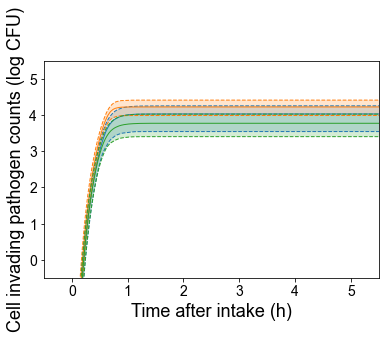

6.000000000000007


In [25]:
Nc_min_27_quantile = np.zeros((len(Ni_list[:,0]), 7), dtype=float)
Nc_min_42_quantile = np.zeros((len(Ni_list[:,0]), 7), dtype=float)
Nc_min_48_quantile = np.zeros((len(Ni_list[:,0]), 7), dtype=float)

for i in range(len(Nc_min_48[:, 0])):
    Nc_min_27_quantile[i, :] =  np.quantile(Nc_min_27[i, :],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    Nc_min_42_quantile[i, :] =  np.quantile(Nc_min_42[i, :],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    Nc_min_48_quantile[i, :] =  np.quantile(Nc_min_48[i, :],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
plt.figure()

plt.fill_between(x[:,0], np.log10(Nc_min_27_quantile[:,1]), np.log10(Nc_min_27_quantile[:,5]), facecolor=Palette[0], alpha=0.2)
plt.plot(x[:,0], np.log10(Nc_min_27_quantile[:,1]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_27_quantile[:,5]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_27_quantile[:,3]), lw=1, color=Palette[0])

plt.fill_between(x[:,0], np.log10(Nc_min_42_quantile[:,1]), np.log10(Nc_min_42_quantile[:,5]), facecolor=Palette[1], alpha=0.2)
plt.plot(x[:,0], np.log10(Nc_min_42_quantile[:,1]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_42_quantile[:,5]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_42_quantile[:,3]), lw=1, color=Palette[1])

plt.fill_between(x[:,0], np.log10(Nc_min_48_quantile[:,1]), np.log10(Nc_min_48_quantile[:,5]), facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], np.log10(Nc_min_48_quantile[:,1]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_48_quantile[:,5]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Nc_min_48_quantile[:,3]), lw=1, color=Palette[2])

plt.rcParams["font.family"] = "Arial"

plt.ylabel("Cell invading pathogen counts (log CFU)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(-0.5, 5.5)
plt.ylim(-0.5, 5.5)
plt.show()
print(logdose[n])

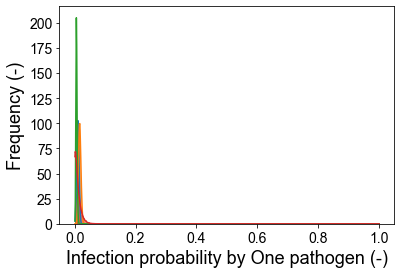

In [26]:
from scipy.stats import beta
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)


plt.hist(Nc_min_27[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[0], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_27[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[0])


plt.hist(Nc_min_42[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[1], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_42[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[1])


plt.hist(Nc_min_48[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[2], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_48[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[2])


plt.hist(Nc_min[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[3], alpha = 0.5)
fit_parameter = beta.fit(Nc_min[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[3])



plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Infection probability by One pathogen (-)",size=18,fontname="Arial")
plt.xlim(-0.05, 1.05)
plt.show()

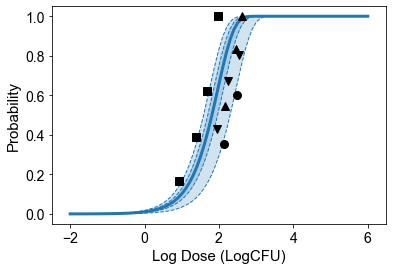

In [27]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_27_quantile[:,1], P_invasion_27_quantile[:,5], 
                 facecolor=Palette[0], alpha=0.2)
plt.plot(logdose, P_invasion_27_quantile[:,1], lw=1, color=Palette[0],linestyle='--')
plt.plot(logdose, P_invasion_27_quantile[:,5], lw=1, color=Palette[0],linestyle='--')


plt.fill_between(logdose, P_invasion_27_quantile[:,2], P_invasion_27_quantile[:,4], 
                 facecolor=Palette[0], alpha=0.2)
plt.plot(logdose, P_invasion_27_quantile[:,2], lw=1, color=Palette[0],linestyle='--')
plt.plot(logdose, P_invasion_27_quantile[:,4], lw=1, color=Palette[0],linestyle='--')


plt.plot(logdose, P_invasion_27_quantile[:,3], lw=3, color=Palette[0], label="RIMD 0366027")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [28]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

0.4321293950694359

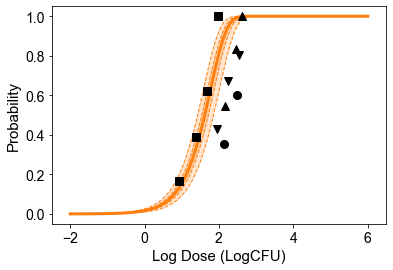

In [29]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_42_quantile[:,1], P_invasion_42_quantile[:,5], facecolor=Palette[1], alpha=0.2)
plt.plot(logdose, P_invasion_42_quantile[:,1], lw=1, color=Palette[1],linestyle='--')
plt.plot(logdose, P_invasion_42_quantile[:,5], lw=1, color=Palette[1],linestyle='--')


plt.fill_between(logdose, P_invasion_42_quantile[:,2], P_invasion_42_quantile[:,4], facecolor=Palette[1], alpha=0.2)
plt.plot(logdose, P_invasion_42_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(logdose, P_invasion_42_quantile[:,4], lw=1, color=Palette[1],linestyle='--')


plt.plot(logdose, P_invasion_42_quantile[:,3], lw=3, color=Palette[1], label="RIMD 0366042")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [30]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

0.4321293950694359

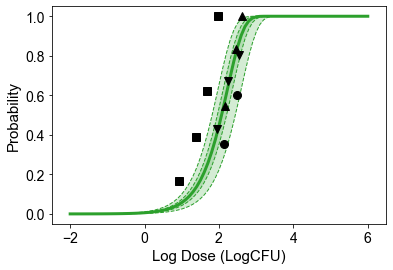

In [31]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_48_quantile[:,1], P_invasion_48_quantile[:,5], facecolor=Palette[2], alpha=0.2)
plt.plot(logdose, P_invasion_48_quantile[:,1], lw=1, color=Palette[2],linestyle='--')
plt.plot(logdose, P_invasion_48_quantile[:,5], lw=1, color=Palette[2],linestyle='--')


plt.fill_between(logdose, P_invasion_48_quantile[:,2], P_invasion_48_quantile[:,4], facecolor=Palette[2], alpha=0.2)
plt.plot(logdose, P_invasion_48_quantile[:,2], lw=1, color=Palette[2],linestyle='--')
plt.plot(logdose, P_invasion_48_quantile[:,4], lw=1, color=Palette[2],linestyle='--')


plt.plot(logdose, P_invasion_48_quantile[:,3], lw=3, color=Palette[2], label="RIMD 0366048")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [32]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

0.4321293950694359

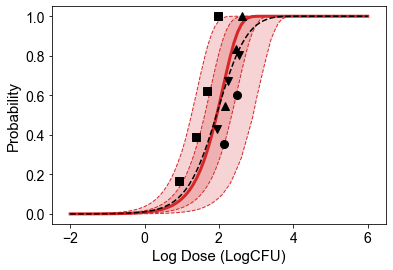

In [33]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_quantile[:,1], P_invasion_quantile[:,5], facecolor=Palette[3], alpha=0.2)
plt.plot(logdose, P_invasion_quantile[:,1], lw=1, color=Palette[3],linestyle='--')
plt.plot(logdose, P_invasion_quantile[:,5], lw=1, color=Palette[3],linestyle='--')


plt.fill_between(logdose, P_invasion_quantile[:,2], P_invasion_quantile[:,4], facecolor=Palette[3], alpha=0.2)
plt.plot(logdose, P_invasion_quantile[:,2], lw=1, color=Palette[3],linestyle='--')
plt.plot(logdose, P_invasion_quantile[:,4], lw=1, color=Palette[3],linestyle='--')


plt.plot(logdose, P_invasion_quantile[:,3], lw=3, color=Palette[3], label="Total of isolations")


plt.plot(logdose, P_invasion_mean[:], lw=1.5, color="black", label="Total of isolations",linestyle='--')


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [34]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

0.4321293950694359

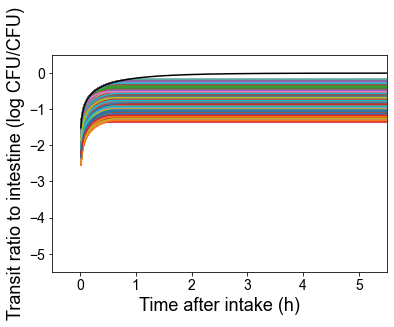

In [35]:
Ni_list = []
Ni_27_list = []
Ni_42_list = []
Ni_48_list = []

plt.rcParams["font.family"] = "Arial"

rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)

for q in tqdm(range(rep_eat),desc='Progress', leave=False):
    
    Ni = np.zeros((len(x), 1), dtype=float)
    dNi = []
    Ni_t = 0
    Ni_27 = np.zeros((len(x), 1), dtype=float)
    dNi_27 = []
    Ni_27_t = 0
    Ni_42 = np.zeros((len(x), 1), dtype=float)
    dNi_42 = []
    Ni_42_t = 0
    Ni_48 = np.zeros((len(x), 1), dtype=float)
    dNi_48 = []
    Ni_48_t = 0
    
    Total = np.zeros((len(x), 1), dtype=float)
    dTotal = []
    Total_t = 0
    
    logSg_using = logSg0_list[:, q]
    logSg_27_using = logSg0_27_list[:, q]
    logSg_42_using = logSg0_42_list[:, q]
    logSg_48_using = logSg0_48_list[:, q]
    
    rcn_gastric_retention = random.choice(range(len(samples_Liquid_retention["alpha"])))
    rcn_gastric_retention_list[q, 0] = rcn_gastric_retention
    alpha = samples_Liquid_retention["alpha"][rcn_gastric_retention]
    beta = samples_Liquid_retention["beta"][rcn_gastric_retention]
    
    
    
    for i in range(len(x)):
        if i == 0:
            Ni[i, 0] = 0
            Ni_27[i, 0] = 0
            Ni_42[i, 0] = 0
            Ni_48[i, 0] = 0
        else:
            Sg = 10**logSg_using[i]
            Sg_27 = 10**logSg_27_using[i]
            Sg_42 = 10**logSg_42_using[i]
            Sg_48 = 10**logSg_48_using[i]
        
            dNi = Sg*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_t = Ni_t + dNi
            Ni[i, 0] = Ni_t
        
            dNi_27 = Sg_27*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_27_t = Ni_27_t + dNi_27
            Ni_27[i, 0] = Ni_27_t
        
            dNi_42 = Sg_42*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_42_t = Ni_42_t + dNi_42
            Ni_42[i, 0] = Ni_42_t

            dNi_48 = Sg_48*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_48_t = Ni_48_t + dNi_48
            Ni_48[i, 0] = Ni_48_t

            dTotal = gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Total_t = Total_t + dTotal
            Total[i, 0] = Total_t

    plt.plot(x[:,0], np.log10(Ni[:,0]), marker="", color=Palette[q])

    
    if q == 0:
        Ni_list = Ni
        Ni_27_list = Ni_27
        Ni_42_list = Ni_42
        Ni_48_list = Ni_48
    else:
        Ni_list = np.concatenate([Ni_list, Ni], axis = -1) 
        Ni_27_list = np.concatenate([Ni_27_list, Ni_27], axis = -1) 
        Ni_42_list = np.concatenate([Ni_42_list, Ni_42], axis = -1) 
        Ni_48_list = np.concatenate([Ni_48_list, Ni_48], axis = -1) 
    
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)

plt.plot(x[:,0], np.log10(Total[:,0]), marker="", color='black')

plt.ylabel("Transit ratio to intestine (log CFU/CFU)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.show()

In [36]:
gamma.pdf(60*x[1], alpha, loc=0, scale=1./beta)

array([0.03037409])

In [37]:
with open('Ni_Liquid_younger.pkl', 'wb') as f:

    pickle.dump(Ni_list, f)

In [38]:
Ni_quantile = np.zeros((len(Ni_list[:,0]), 3), dtype=float)
Ni_27_quantile = np.zeros((len(Ni_27_list[:,0]), 3), dtype=float)
Ni_42_quantile = np.zeros((len(Ni_42_list[:,0]), 3), dtype=float)
Ni_48_quantile = np.zeros((len(Ni_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(Ni_list[:,0])),desc='Progress', leave=False):
    Ni_quantile[n,:] =  np.quantile(Ni_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_27_quantile[n,:] =  np.quantile(Ni_27_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_42_quantile[n,:] =  np.quantile(Ni_42_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_48_quantile[n,:] =  np.quantile(Ni_48_list[n,:],[ 0.05, 0.5, 0.95])

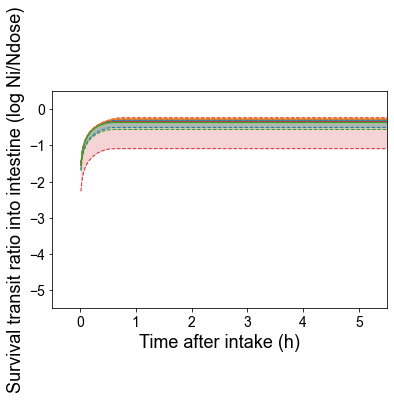

In [39]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0], np.log10(Ni_quantile[:,0]), np.log10(Ni_quantile[:,2]), facecolor=Palette[3], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_27_quantile[:,0]), np.log10(Ni_27_quantile[:,2]), facecolor=Palette[0], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_42_quantile[:,0]), np.log10(Ni_42_quantile[:,2]), facecolor=Palette[1], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_48_quantile[:,0]), np.log10(Ni_48_quantile[:,2]), facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], np.log10(Ni_quantile[:,2]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,2]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,2]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,2]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_quantile[:,0]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,0]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,0]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,0]), lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0], np.log10(Ni_quantile[:,1]), lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,1]), lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,1]), lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,1]), lw=1, color=Palette[2], label="Survival ratio")



plt.ylabel("Survival transit ratio into intestine (log Ni/Ndose)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

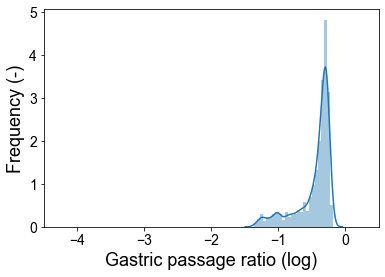

In [40]:
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)
sns.distplot(np.log10(Ni_list)[-1,:])
plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Gastric passage ratio (log)",size=18,fontname="Arial")
plt.xlim(-4.5, 0.5)
plt.show()

In [41]:
V = 319
Ni_min = Ni_list
Ni_27_min = Ni_27_list
Ni_42_min = Ni_42_list
Ni_48_min = Ni_48_list

Nc_min_mean = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

logdose = np.arange(-2, 6+1/10, 1/10, dtype="float")

S = 32*10**4

P_invasion_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_mean = np.zeros((len(logdose),1), dtype=float)
ratio_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_27_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_27_mean = np.zeros((len(logdose),1), dtype=float)
ratio_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_42_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_42_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_42_mean = np.zeros((len(logdose),1), dtype=float)

P_invasion_48_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_48_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_48_mean = np.zeros((len(logdose),1), dtype=float)


In [42]:
for n in tqdm(range(len(logdose)) ,desc='Progress', leave=False):
    warnings.simplefilter('ignore', RuntimeWarning)
    for k in tqdm(range(len(Ni_min[0, :])),desc='Progress', leave=False):

        rcn = random.randrange(len(samples_27["LogNmax"]))
        
        LogNmax_27 = samples_27["LogNmax"][rcn]
        Logmu_27 = samples_27["Logmu"][rcn]
        Nmax_27 = 10**LogNmax_27
        mu_27 = 10**Logmu_27

        LogNmax_42 = samples_42["LogNmax"][rcn]
        Logmu_42 = samples_42["Logmu"][rcn]
        Nmax_42 = 10**LogNmax_42
        mu_42 = 10**Logmu_42

        LogNmax_48 = samples_48["LogNmax"][rcn]
        Logmu_48 = samples_48["Logmu"][rcn]
        Nmax_48 = 10**LogNmax_48
        mu_48 = 10**Logmu_48
        
        Nmax= random.choice([Nmax_27, Nmax_42, Nmax_48])
        mu = random.choice([mu_27, mu_42, mu_48])

        for i in range(len(Ni_min[:, 0])):
        
            Ni = Ni_min[i, k]*10**logdose[n]
            Ni_27 = Ni_27_min[i, k]*10**logdose[n]
            Ni_42 = Ni_42_min[i, k]*10**logdose[n]
            Ni_48 = Ni_48_min[i, k]*10**logdose[n]
            
            T = i/60
            h = 1/60
    
            def ODE_all (y, t):
                return mu_27*(Ni-y)*(S*Nmax - y)/V
    
            def ODE_27 (y, t):
                return mu_27*(Ni_27-y)*(S*Nmax_27 - y)/V

            def ODE_42 (y, t):
                return mu_42*(Ni_42-y)*(S*Nmax_42 - y)/V

            def ODE_48 (y, t):
                return mu_48*(Ni_48-y)*(S*Nmax_48 - y)/V
    
            if i==0:
                Nc_min[i, k] = 0
                Nc_min_27[i, k] = 0
                Nc_min_42[i, k] = 0
                Nc_min_48[i, k] = 0
                
            else:
                
                Nc_min_mean[i, k] = rk4 ( Nc_min_mean[i-1, k], h, T-h, ODE_all)[0]
                Nc_min[i, k] = Nc_min_mean[i, k]
                
                Nc_min_mean_27[i, k] = rk4 ( Nc_min_mean_27[i-1, k], h, T-h, ODE_27)[0]
                Nc_min_27[i, k] = Nc_min_mean_27[i, k]
        
                Nc_min_mean_42[i, k] = rk4 ( Nc_min_mean_42[i-1, k], h, T-h, ODE_42)[0]
                Nc_min_42[i, k] = Nc_min_mean_42[i, k]
        
                Nc_min_mean_48[i, k] = rk4 ( Nc_min_mean_48[i-1, k], h, T-h, ODE_48)[0]
                Nc_min_48[i, k] = Nc_min_mean_48[i, k]

        
        rcn = random.choice(range(len(samples_Colonic_filling["alpha"])))
        t = int(round(np.random.gamma(samples_Colonic_filling["alpha"][rcn],
                                        1/samples_Colonic_filling["beta"][rcn])))
        t = np.min((t,len(Ni_min[:, 0])-1))

        ratio = Nc_min[t,k]/10**logdose[n] 
        P_invasion =  1- (1-ratio)**(10**logdose[n])
        P_invasion_mcmc[n,k] = P_invasion

        ratio_27 = Nc_min_27[t,k]/10**logdose[n] 
        P_invasion_27 =  1- (1-ratio_27)**(10**logdose[n])
        P_invasion_27_mcmc[n,k] = P_invasion_27
        
        ratio_42 = Nc_min_42[t,k]/10**logdose[n] 
        P_invasion_42 =  1- (1-ratio_42)**(10**logdose[n])
        P_invasion_42_mcmc[n,k] = P_invasion_42
        
        ratio_48 = Nc_min_48[t,k]/10**logdose[n]    
        P_invasion_48 =  1- (1-ratio_48)**(10**logdose[n])
        P_invasion_48_mcmc[n,k] = P_invasion_48
        
        
    P_invasion_quantile[n,:] =  np.quantile(P_invasion_mcmc[n,:][np.invert(np.isnan(P_invasion_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_mean[n,:] =  np.mean(P_invasion_mcmc[n,:][np.invert(np.isinf(P_invasion_mcmc[n,:])|np.isnan(P_invasion_mcmc[n,:]))])
    
    P_invasion_27_quantile[n,:] =  np.quantile(P_invasion_27_mcmc[n,:][np.invert(np.isnan(P_invasion_27_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_27_mean[n,:] =  np.mean(P_invasion_27_mcmc[n,:][np.invert(np.isinf(P_invasion_27_mcmc[n,:])|np.isnan(P_invasion_27_mcmc[n,:]))])
    
    P_invasion_42_quantile[n,:] =  np.quantile(P_invasion_42_mcmc[n,:][np.invert(np.isnan(P_invasion_42_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_42_mean[n,:] =  np.mean(P_invasion_42_mcmc[n,:][np.invert(np.isinf(P_invasion_42_mcmc[n,:])|np.isnan(P_invasion_42_mcmc[n,:]))])
    
    P_invasion_48_quantile[n,:] =  np.quantile(P_invasion_48_mcmc[n,:][np.invert(np.isnan(P_invasion_48_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_48_mean[n,:] =  np.mean(P_invasion_48_mcmc[n,:][np.invert(np.isinf(P_invasion_48_mcmc[n,:])|np.isnan(P_invasion_48_mcmc[n,:]))])

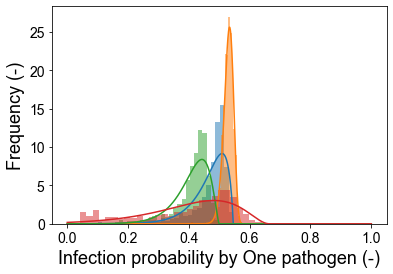

In [43]:
from scipy.stats import beta
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)


plt.hist(Nc_min_27[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[0], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_27[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[0])


plt.hist(Nc_min_42[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[1], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_42[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[1])


plt.hist(Nc_min_48[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[2], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_48[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[2])


plt.hist(Nc_min[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[3], alpha = 0.5)
fit_parameter = beta.fit(Nc_min[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[3])



plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Infection probability by One pathogen (-)",size=18,fontname="Arial")
plt.xlim(-0.05, 1.05)
plt.show()

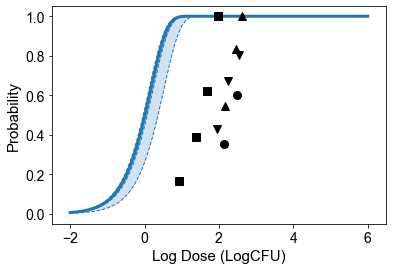

In [44]:
from scipy.stats import beta
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_27_quantile[:,1], P_invasion_27_quantile[:,5], facecolor=Palette[0], alpha=0.2)
plt.plot(logdose, P_invasion_27_quantile[:,1], lw=1, color=Palette[0],linestyle='--')
plt.plot(logdose, P_invasion_27_quantile[:,5], lw=1, color=Palette[0],linestyle='--')


plt.fill_between(logdose, P_invasion_27_quantile[:,2], P_invasion_27_quantile[:,4], facecolor=Palette[0], alpha=0.2)
plt.plot(logdose, P_invasion_27_quantile[:,2], lw=1, color=Palette[0],linestyle='--')
plt.plot(logdose, P_invasion_27_quantile[:,4], lw=1, color=Palette[0],linestyle='--')


plt.plot(logdose, P_invasion_27_quantile[:,3], lw=3, color=Palette[0], label="RIMD 0366027")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [45]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

1.8204630359150578

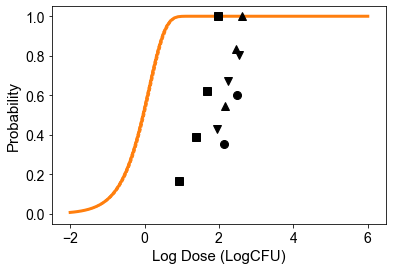

In [46]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_42_quantile[:,1], P_invasion_42_quantile[:,5], facecolor=Palette[1], alpha=0.2)
plt.plot(logdose, P_invasion_42_quantile[:,1], lw=1, color=Palette[1],linestyle='--')
plt.plot(logdose, P_invasion_42_quantile[:,5], lw=1, color=Palette[1],linestyle='--')


plt.fill_between(logdose, P_invasion_42_quantile[:,2], P_invasion_42_quantile[:,4], facecolor=Palette[1], alpha=0.2)
plt.plot(logdose, P_invasion_42_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(logdose, P_invasion_42_quantile[:,4], lw=1, color=Palette[1],linestyle='--')


plt.plot(logdose, P_invasion_42_quantile[:,3], lw=3, color=Palette[1], label="RIMD 0366042")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [47]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

1.8204630359150578

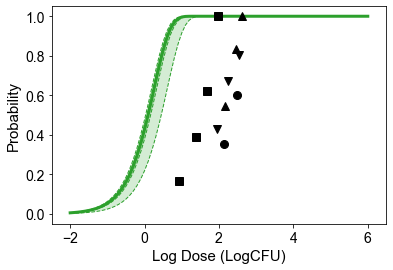

In [48]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_48_quantile[:,1], P_invasion_48_quantile[:,5], facecolor=Palette[2], alpha=0.2)
plt.plot(logdose, P_invasion_48_quantile[:,1], lw=1, color=Palette[2],linestyle='--')
plt.plot(logdose, P_invasion_48_quantile[:,5], lw=1, color=Palette[2],linestyle='--')


plt.fill_between(logdose, P_invasion_48_quantile[:,2], P_invasion_48_quantile[:,4], facecolor=Palette[2], alpha=0.2)
plt.plot(logdose, P_invasion_48_quantile[:,2], lw=1, color=Palette[2],linestyle='--')
plt.plot(logdose, P_invasion_48_quantile[:,4], lw=1, color=Palette[2],linestyle='--')


plt.plot(logdose, P_invasion_48_quantile[:,3], lw=3, color=Palette[2], label="RIMD 0366048")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [49]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

1.8204630359150578

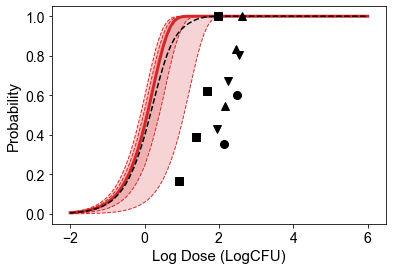

In [50]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_quantile[:,1], P_invasion_quantile[:,5], facecolor=Palette[3], alpha=0.2)
plt.plot(logdose, P_invasion_quantile[:,1], lw=1, color=Palette[3],linestyle='--')
plt.plot(logdose, P_invasion_quantile[:,5], lw=1, color=Palette[3],linestyle='--')


plt.fill_between(logdose, P_invasion_quantile[:,2], P_invasion_quantile[:,4], facecolor=Palette[3], alpha=0.2)
plt.plot(logdose, P_invasion_quantile[:,2], lw=1, color=Palette[3],linestyle='--')
plt.plot(logdose, P_invasion_quantile[:,4], lw=1, color=Palette[3],linestyle='--')


plt.plot(logdose, P_invasion_quantile[:,3], lw=3, color=Palette[3], label="Total of isolations")


plt.plot(logdose, P_invasion_mean[:], lw=1.5, color="black", label="Total of isolations",linestyle='--')


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [51]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

1.8204630359150578

In [52]:
#Repetition of simulation
rep_eat = 1000

# Color Difinition
Palette=sns.color_palette(n_colors = rep_eat)

#Max Time (h) 
Tmax = 15

#Difinition of time-array (h) 
x =  np.zeros((Tmax*60*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, Tmax, Tmax*60*60+1)

##### Definition of Gastric passage log counts
logSg0_list = []
logSg0 = np.zeros((len(x), 1), dtype=float)
t_star = []

logSg0_27_list = []
logSg0_27 = np.zeros((len(x), 1), dtype=float)
t_star_27 = []

logSg0_42_list = []
logSg0_42 = np.zeros((len(x), 1), dtype=float)
t_star_42 = []

logSg0_48_list = []
logSg0_48 = np.zeros((len(x), 1), dtype=float)
t_star_48 = []

rcn_between_strain_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_27_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_42_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_48_list = np.zeros((rep_eat, 1), dtype=int)
rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)

rcn_pH_list = np.zeros((rep_eat, 1), dtype=int)
pH_Lowest_list = np.zeros((rep_eat, 1), dtype=float)
pH_A_list = np.zeros((rep_eat, 1), dtype=float)
pH_k_list = np.zeros((rep_eat, 1), dtype=float)
pH_sigma_list = np.zeros((rep_eat, 1), dtype=float)
pH_list = np.zeros((len(x), rep_eat), dtype=float)

reduction_a_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_27_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_42_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_48_list = np.zeros((rep_eat, 1), dtype=float)

for i in tqdm(range(rep_eat), desc = 'Progress', leave = False):
    
    rcn_pH = random.choice(range(len(samples_pH_change_elder["lp__"])))
    rcn_pH_list[i, 0] = rcn_pH
    Lowest = samples_pH_change_elder["Lowest"][rcn_pH]
    A = samples_pH_change_elder["A"][rcn_pH]
    k = samples_pH_change_elder["k"][rcn_pH]
    sigma_pH = samples_pH_change_elder["sigma"][rcn_pH]
    
    pH_Lowest_list[i, 0] = samples_pH_change_elder["Lowest"][rcn_pH]
    pH_A_list[i, 0] = samples_pH_change_elder["A"][rcn_pH]
    pH_k_list[i, 0] = samples_pH_change_elder["k"][rcn_pH]
    pH_sigma_list[i, 0] = samples_pH_change_elder["sigma"][rcn_pH]
    
    for t in range(len(x)):
        pH_list[t, i] = np.random.normal(Lowest+A*np.exp(-k*x[t, 0]*3600), sigma_pH)

In [53]:
##### Simulation of Gastric passage log counts
warnings.simplefilter('ignore', RuntimeWarning)
for i in tqdm(range(rep_eat), desc = 'Progress', leave = False):
    
    

    rcn_between_strain = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_between_strain_list[i, 0] = rcn_between_strain
    abef0 = samples_between_strain["abef0"][rcn_between_strain]
    cov = samples_between_strain["cov"][rcn_between_strain]
    abef = np.random.multivariate_normal(abef0, cov, size = 1)[0]
    a = abef[0]
    b = abef[1]
    e = abef[2]
    f = abef[3]
    
    reduction_a_list[i,0] = a
    reduction_b_list[i,0] = b
    reduction_e_list[i,0] = e
    reduction_f_list[i,0] = f
    
    rcn_each_strain_27 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_27_list[i, 0] = rcn_each_strain_27
    
    a_27 = samples_between_strain["a"][rcn_between_strain, 2]
    b_27 = samples_between_strain["b"][rcn_between_strain, 2]
    e_27 = samples_between_strain["e"][rcn_between_strain, 2]
    f_27 = samples_between_strain["f"][rcn_between_strain, 2]
    
    reduction_a_27_list[i,0] = a
    reduction_b_27_list[i,0] = b
    reduction_e_27_list[i,0] = e
    reduction_f_27_list[i,0] = f
    
    rcn_each_strain_42 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_42_list[i, 0] = rcn_each_strain_42
    
    a_42 = samples_between_strain["a"][rcn_between_strain, 5]
    b_42 = samples_between_strain["b"][rcn_between_strain, 5]
    e_42 = samples_between_strain["e"][rcn_between_strain, 5]
    f_42 = samples_between_strain["f"][rcn_between_strain, 5]
    
    reduction_a_42_list[i,0] = a
    reduction_b_42_list[i,0] = b
    reduction_e_42_list[i,0] = e
    reduction_f_42_list[i,0] = f
    
    
    rcn_each_strain_48 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_48_list[i, 0] = rcn_each_strain_48
    
    a_48 = samples_between_strain["a"][rcn_between_strain, 8]
    b_48 =  samples_between_strain["b"][rcn_between_strain, 8]
    e_48 =  samples_between_strain["e"][rcn_between_strain, 8]
    f_48 =  samples_between_strain["f"][rcn_between_strain, 8]
    
    reduction_a_48_list[i,0] = a
    reduction_b_48_list[i,0] = b
    reduction_e_48_list[i,0] = e
    reduction_f_48_list[i,0] = f
    
    
    
    # Predict log reduction from between strain model
    for t in range(len(x)):
        if t==0:
            logSg0[t] = 0
            logSg0_27[t] = 0
            logSg0_42[t] = 0
            logSg0_48[t] = 0
            pH_before = pH_list[t, i]
        else :
            pH_next = pH_list[t, i]
            pH = (pH_before + pH_next)/2
            pH_before = pH_next
            
            logd = (a*pH+b)
            logp = e*pH+f
            logdp = [logd, logp]
            
            logd_27 = (a_27*pH+b_27)
            logp_27 = e_27*pH+f_27
            logdp_27 = [logd_27, logp_27]
            
            logd_42 = (a_42*pH+b_42)
            logp_42 = e_42*pH+f_42
            logdp_42 = [logd_42, logp_42]
            
            logd_48 = (a_48*pH+b_48)
            logp_48 = e_48*pH+f_48
            logdp_48 = [logd_48, logp_48]
            
            d = np.exp(logdp[0])/60
            p = np.exp(logdp[1])
            t_star =  d*(-(logSg0[t-1]))**(1/p)
            logSg0[t] = -((t_star+(x[t]-x[t-1]))/d)**p
            
            d_27 = np.exp(logdp_27[0])/60
            p_27 = np.exp(logdp_27[1])
            t_star_27 =  d_27*(-(logSg0_27[t-1]))**(1/p_27)
            logSg0_27[t] = -((t_star_27+(x[t]-x[t-1]))/d_27)**p_27
            
            d_42 = np.exp(logdp_42[0])/60
            p_42 = np.exp(logdp_42[1])
            t_star_42 =  d_42*(-(logSg0_42[t-1]))**(1/p_42)
            logSg0_42[t] = -((t_star_42+(x[t]-x[t-1]))/d_42)**p_42
            
            d_48 = np.exp(logdp_48[0])/60
            p_48 = np.exp(logdp_48[1])
            t_star_48 =  d_48*(-(logSg0_48[t-1]))**(1/p_48)
            logSg0_48[t] = -((t_star_48+(x[t]-x[t-1]))/d_48)**p_48
    
    if i == 0:
        logSg0_list = logSg0
        logSg0_27_list = logSg0_27
        logSg0_42_list = logSg0_42
        logSg0_48_list = logSg0_48
    else:
        logSg0_list = np.concatenate([logSg0_list, logSg0], axis = -1) 
        logSg0_27_list = np.concatenate([logSg0_27_list, logSg0_27], axis = -1) 
        logSg0_42_list = np.concatenate([logSg0_42_list, logSg0_42], axis = -1) 
        logSg0_48_list = np.concatenate([logSg0_48_list, logSg0_48], axis = -1) 

In [54]:
x =  np.zeros((Tmax*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, Tmax, Tmax*60+1)
logSg0_min = np.zeros((len(x), len(logSg0_list[0,:])), dtype=float)
logSg0_27_min = np.zeros((len(x), len(logSg0_27_list[0,:])), dtype=float)
logSg0_42_min = np.zeros((len(x), len(logSg0_42_list[0,:])), dtype=float)
logSg0_48_min = np.zeros((len(x), len(logSg0_48_list[0,:])), dtype=float)

for i in range(len(x)):
    logSg0_min[i,:] = logSg0_list[i*60,:]
    logSg0_27_min[i,:] = logSg0_27_list[i*60,:]
    logSg0_42_min[i,:] = logSg0_42_list[i*60,:]
    logSg0_48_min[i,:] = logSg0_48_list[i*60,:]

logSg0_list=logSg0_min
logSg0_min=0
logSg0_27_list=logSg0_27_min
logSg0_27_min=0
logSg0_42_list=logSg0_42_min
logSg0_42_min=0
logSg0_48_list=logSg0_48_min
logSg0_48_min=0

In [55]:
logSg0_quantile = np.zeros((len(logSg0_list[:,0]), 3), dtype=float)
logSg0_27_quantile = np.zeros((len(logSg0_27_list[:,0]), 3), dtype=float)
logSg0_42_quantile = np.zeros((len(logSg0_42_list[:,0]), 3), dtype=float)
logSg0_48_quantile = np.zeros((len(logSg0_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(logSg0_list[:,0])),desc='Progress', leave=False):
    logSg0_quantile[n,:] =  np.quantile(logSg0_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_27_quantile[n,:] =  np.quantile(logSg0_27_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_42_quantile[n,:] =  np.quantile(logSg0_42_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_48_quantile[n,:] =  np.quantile(logSg0_48_list[n,:],[ 0.05, 0.5, 0.95])

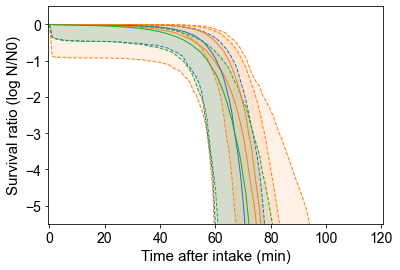

In [56]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0]*60, logSg0_quantile[:,0], logSg0_quantile[:,2], facecolor=Palette[1], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0]*60, logSg0_quantile[:,0], lw=1, color=Palette[1],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_27_quantile[:,0], logSg0_27_quantile[:,2], facecolor=Palette[0], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_27_quantile[:,2], lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0]*60, logSg0_27_quantile[:,0], lw=1, color=Palette[0],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_42_quantile[:,0], logSg0_42_quantile[:,2], facecolor=Palette[1], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_42_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0]*60, logSg0_42_quantile[:,0], lw=1, color=Palette[1],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_48_quantile[:,0], logSg0_48_quantile[:,2], facecolor=Palette[2], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_48_quantile[:,2], lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0]*60, logSg0_48_quantile[:,0], lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0]*60, logSg0_quantile[:,1], lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_27_quantile[:,1], lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_42_quantile[:,1], lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_48_quantile[:,1], lw=1, color=Palette[2], label="Survival ratio")

plt.ylabel("Survival ratio (log N/N0)", size=15, fontname="Arial")
plt.xlabel("Time after intake (min)",size=15,fontname="Arial")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(-0.5, 120.5)
plt.ylim(-5.5, 0.5)
plt.show()

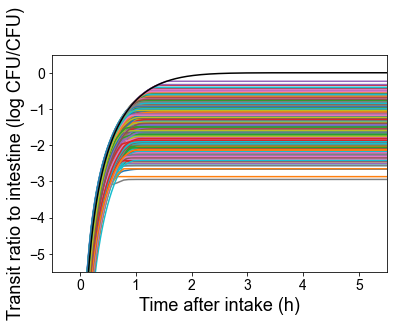

In [57]:
Ni_list = []
Ni_27_list = []
Ni_42_list = []
Ni_48_list = []

plt.rcParams["font.family"] = "Arial"

rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)

for q in tqdm(range(rep_eat),desc='Progress', leave=False):
    
    Ni = np.zeros((len(x), 1), dtype=float)
    dNi = []
    Ni_t = 0
    Ni_27 = np.zeros((len(x), 1), dtype=float)
    dNi_27 = []
    Ni_27_t = 0
    Ni_42 = np.zeros((len(x), 1), dtype=float)
    dNi_42 = []
    Ni_42_t = 0
    Ni_48 = np.zeros((len(x), 1), dtype=float)
    dNi_48 = []
    Ni_48_t = 0
    
    Total = np.zeros((len(x), 1), dtype=float)
    dTotal = []
    Total_t = 0
    
    logSg_using = logSg0_list[:, q]
    logSg_27_using = logSg0_27_list[:, q]
    logSg_42_using = logSg0_42_list[:, q]
    logSg_48_using = logSg0_48_list[:, q]
    
    rcn_gastric_retention = random.choice(range(len(samples_Solid_retention["alpha"])))
    rcn_gastric_retention_list[q, 0] = rcn_gastric_retention
    alpha = samples_Solid_retention["alpha"][rcn_gastric_retention]
    beta = samples_Solid_retention["beta"][rcn_gastric_retention]
    
    
    
    for i in range(len(x)):
        Sg = 10**logSg_using[i]
        Sg_27 = 10**logSg_27_using[i]
        Sg_42 = 10**logSg_42_using[i]
        Sg_48 = 10**logSg_48_using[i]
        
        dNi = Sg*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
        Ni_t = Ni_t + dNi
        Ni[i, 0] = Ni_t
        
        dNi_27 = Sg_27*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
        Ni_27_t = Ni_27_t + dNi_27
        Ni_27[i, 0] = Ni_27_t
        
        dNi_42 = Sg_42*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
        Ni_42_t = Ni_42_t + dNi_42
        Ni_42[i, 0] = Ni_42_t
        
        dNi_48 = Sg_48*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
        Ni_48_t = Ni_48_t + dNi_48
        Ni_48[i, 0] = Ni_48_t
        
        dTotal = gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
        Total_t = Total_t + dTotal
        Total[i, 0] = Total_t

    plt.plot(x[:,0], np.log10(Ni[:,0]), marker="", color=Palette[q])

    
    if q == 0:
        Ni_list = Ni
        Ni_27_list = Ni_27
        Ni_42_list = Ni_42
        Ni_48_list = Ni_48
    else:
        Ni_list = np.concatenate([Ni_list, Ni], axis = -1) 
        Ni_27_list = np.concatenate([Ni_27_list, Ni_27], axis = -1) 
        Ni_42_list = np.concatenate([Ni_42_list, Ni_42], axis = -1) 
        Ni_48_list = np.concatenate([Ni_48_list, Ni_48], axis = -1) 
    
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)

plt.plot(x[:,0], np.log10(Total[:,0]), marker="", color='black')

plt.ylabel("Transit ratio to intestine (log CFU/CFU)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.show()

In [58]:
with open('Ni_Solid_elder.pkl', 'wb') as f:

    pickle.dump(Ni_list, f)

In [59]:
Ni_quantile = np.zeros((len(Ni_list[:,0]), 3), dtype=float)
Ni_27_quantile = np.zeros((len(Ni_27_list[:,0]), 3), dtype=float)
Ni_42_quantile = np.zeros((len(Ni_42_list[:,0]), 3), dtype=float)
Ni_48_quantile = np.zeros((len(Ni_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(Ni_list[:,0])),desc='Progress', leave=False):
    Ni_quantile[n,:] =  np.quantile(Ni_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_27_quantile[n,:] =  np.quantile(Ni_27_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_42_quantile[n,:] =  np.quantile(Ni_42_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_48_quantile[n,:] =  np.quantile(Ni_48_list[n,:],[ 0.05, 0.5, 0.95])

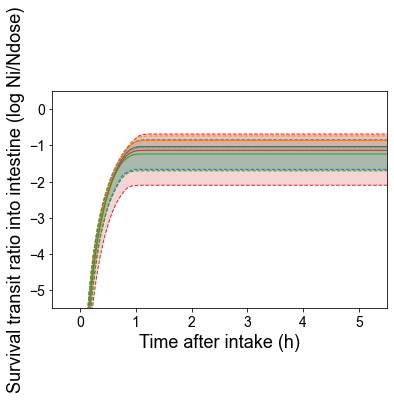

In [60]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0], np.log10(Ni_quantile[:,0]), np.log10(Ni_quantile[:,2]), facecolor=Palette[3], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_27_quantile[:,0]), np.log10(Ni_27_quantile[:,2]), facecolor=Palette[0], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_42_quantile[:,0]), np.log10(Ni_42_quantile[:,2]), facecolor=Palette[1], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_48_quantile[:,0]), np.log10(Ni_48_quantile[:,2]), facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], np.log10(Ni_quantile[:,2]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,2]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,2]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,2]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_quantile[:,0]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,0]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,0]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,0]), lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0], np.log10(Ni_quantile[:,1]), lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,1]), lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,1]), lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,1]), lw=1, color=Palette[2], label="Survival ratio")



plt.ylabel("Survival transit ratio into intestine (log Ni/Ndose)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

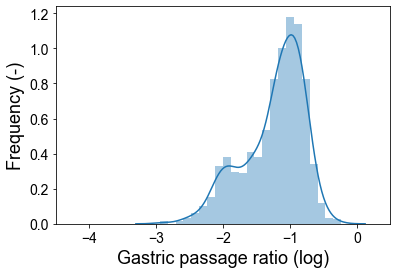

In [61]:
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)
sns.distplot(np.log10(Ni_list)[-1,:])
plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Gastric passage ratio (log)",size=18,fontname="Arial")
plt.xlim(-4.5, 0.5)
plt.show()

In [62]:
V = 319
Ni_min = Ni_list
Ni_27_min = Ni_27_list
Ni_42_min = Ni_42_list
Ni_48_min = Ni_48_list

Nc_min_mean_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

logdose = np.arange(-2, 6+1/10, 1/10, dtype="float")

S = 32*10**4

P_invasion_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_27_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_27_mean = np.zeros((len(logdose),1), dtype=float)
ratio_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)


P_invasion_42_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_42_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_42_mean = np.zeros((len(logdose),1), dtype=float)

P_invasion_48_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_48_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_48_mean = np.zeros((len(logdose),1), dtype=float)


In [63]:
for n in tqdm(range(len(logdose)) ,desc='Progress', leave=False):
    warnings.simplefilter('ignore', RuntimeWarning)
    for k in tqdm(range(len(Ni_min[0, :])),desc='Progress', leave=False):

        rcn = random.randrange(len(samples_27["LogNmax"]))
        
        LogNmax_27 = samples_27["LogNmax"][rcn]
        Logmu_27 = samples_27["Logmu"][rcn]
        Nmax_27 = 10**LogNmax_27
        mu_27 = 10**Logmu_27

        LogNmax_42 = samples_42["LogNmax"][rcn]
        Logmu_42 = samples_42["Logmu"][rcn]
        Nmax_42 = 10**LogNmax_42
        mu_42 = 10**Logmu_42

        LogNmax_48 = samples_48["LogNmax"][rcn]
        Logmu_48 = samples_48["Logmu"][rcn]
        Nmax_48 = 10**LogNmax_48
        mu_48 = 10**Logmu_48
        
        Nmax= random.choice([Nmax_27, Nmax_42, Nmax_48])
        mu = random.choice([mu_27, mu_42, mu_48])

        for i in range(len(Ni_min[:, 0])):
        
            Ni = Ni_min[i, k]*10**logdose[n]
            Ni_27 = Ni_27_min[i, k]*10**logdose[n]
            Ni_42 = Ni_42_min[i, k]*10**logdose[n]
            Ni_48 = Ni_48_min[i, k]*10**logdose[n]
            
            T = i/60
            h = 1/60
    
            def ODE_all (y, t):
                return mu_27*(Ni-y)*(S*Nmax - y)/V
    
            def ODE_27 (y, t):
                return mu_27*(Ni_27-y)*(S*Nmax_27 - y)/V

            def ODE_42 (y, t):
                return mu_42*(Ni_42-y)*(S*Nmax_42 - y)/V

            def ODE_48 (y, t):
                return mu_48*(Ni_48-y)*(S*Nmax_48 - y)/V
    
            if i==0:
                Nc_min[i, k] = 0
                Nc_min_27[i, k] = 0
                Nc_min_42[i, k] = 0
                Nc_min_48[i, k] = 0
                
            else:
                
                Nc_min_mean[i, k] = rk4 ( Nc_min_mean[i-1, k], h, T-h, ODE_all)[0]
                Nc_min[i, k] = Nc_min_mean[i, k]
                
                Nc_min_mean_27[i, k] = rk4 ( Nc_min_mean_27[i-1, k], h, T-h, ODE_27)[0]
                Nc_min_27[i, k] = Nc_min_mean_27[i, k]
        
                Nc_min_mean_42[i, k] = rk4 ( Nc_min_mean_42[i-1, k], h, T-h, ODE_42)[0]
                Nc_min_42[i, k] = Nc_min_mean_42[i, k]
        
                Nc_min_mean_48[i, k] = rk4 ( Nc_min_mean_48[i-1, k], h, T-h, ODE_48)[0]
                Nc_min_48[i, k] = Nc_min_mean_48[i, k]

        
        rcn = random.choice(range(len(samples_Colonic_filling["alpha"])))
        t = int(round(np.random.gamma(samples_Colonic_filling["alpha"][rcn],
                                        1/samples_Colonic_filling["beta"][rcn])))
        t = np.min((t,len(Ni_min[:, 0])-1))

        ratio = Nc_min[t,k]/10**logdose[n] 
        P_invasion =  1- (1-ratio)**(10**logdose[n])
        P_invasion_mcmc[n,k] = P_invasion

        ratio_27 = Nc_min_27[t,k]/10**logdose[n] 
        P_invasion_27 =  1- (1-ratio_27)**(10**logdose[n])
        P_invasion_27_mcmc[n,k] = P_invasion_27
        
        ratio_42 = Nc_min_42[t,k]/10**logdose[n] 
        P_invasion_42 =  1- (1-ratio_42)**(10**logdose[n])
        P_invasion_42_mcmc[n,k] = P_invasion_42
        
        ratio_48 = Nc_min_48[t,k]/10**logdose[n]    
        P_invasion_48 =  1- (1-ratio_48)**(10**logdose[n])
        P_invasion_48_mcmc[n,k] = P_invasion_48
        
        
    P_invasion_quantile[n,:] =  np.quantile(P_invasion_mcmc[n,:][np.invert(np.isnan(P_invasion_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_mean[n,:] =  np.mean(P_invasion_mcmc[n,:][np.invert(np.isinf(P_invasion_mcmc[n,:])|np.isnan(P_invasion_mcmc[n,:]))])
    
    P_invasion_27_quantile[n,:] =  np.quantile(P_invasion_27_mcmc[n,:][np.invert(np.isnan(P_invasion_27_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_27_mean[n,:] =  np.mean(P_invasion_27_mcmc[n,:][np.invert(np.isinf(P_invasion_27_mcmc[n,:])|np.isnan(P_invasion_27_mcmc[n,:]))])
    
    P_invasion_42_quantile[n,:] =  np.quantile(P_invasion_42_mcmc[n,:][np.invert(np.isnan(P_invasion_42_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_42_mean[n,:] =  np.mean(P_invasion_42_mcmc[n,:][np.invert(np.isinf(P_invasion_42_mcmc[n,:])|np.isnan(P_invasion_42_mcmc[n,:]))])
    
    P_invasion_48_quantile[n,:] =  np.quantile(P_invasion_48_mcmc[n,:][np.invert(np.isnan(P_invasion_48_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_48_mean[n,:] =  np.mean(P_invasion_48_mcmc[n,:][np.invert(np.isinf(P_invasion_48_mcmc[n,:])|np.isnan(P_invasion_48_mcmc[n,:]))])

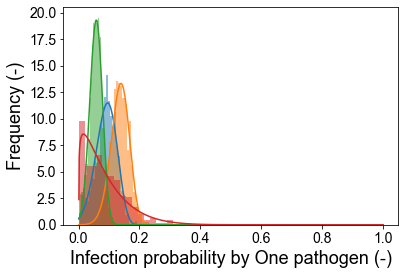

In [64]:
from scipy.stats import beta
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)


plt.hist(Nc_min_27[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[0], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_27[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[0])


plt.hist(Nc_min_42[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[1], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_42[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[1])


plt.hist(Nc_min_48[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[2], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_48[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[2])


plt.hist(Nc_min[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[3], alpha = 0.5)
fit_parameter = beta.fit(Nc_min[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[3])



plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Infection probability by One pathogen (-)",size=18,fontname="Arial")
plt.xlim(-0.05, 1.05)
plt.show()

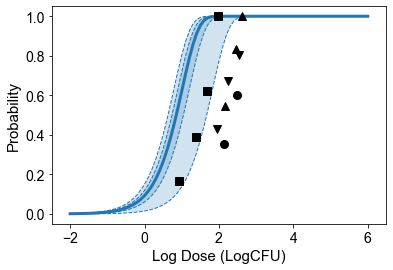

In [65]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_27_quantile[:,1], P_invasion_27_quantile[:,5], facecolor=Palette[0], alpha=0.2)
plt.plot(logdose, P_invasion_27_quantile[:,1], lw=1, color=Palette[0],linestyle='--')
plt.plot(logdose, P_invasion_27_quantile[:,5], lw=1, color=Palette[0],linestyle='--')


plt.fill_between(logdose, P_invasion_27_quantile[:,2], P_invasion_27_quantile[:,4], facecolor=Palette[0], alpha=0.2)
plt.plot(logdose, P_invasion_27_quantile[:,2], lw=1, color=Palette[0],linestyle='--')
plt.plot(logdose, P_invasion_27_quantile[:,4], lw=1, color=Palette[0],linestyle='--')


plt.plot(logdose, P_invasion_27_quantile[:,3], lw=3, color=Palette[0], label="RIMD 0366027")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [66]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

0.9634537355696281

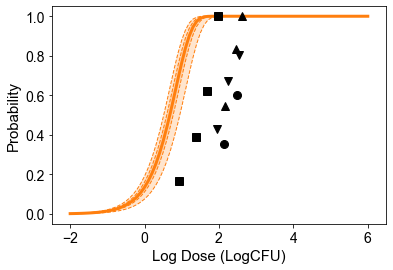

In [67]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_42_quantile[:,1], P_invasion_42_quantile[:,5], facecolor=Palette[1], alpha=0.2)
plt.plot(logdose, P_invasion_42_quantile[:,1], lw=1, color=Palette[1],linestyle='--')
plt.plot(logdose, P_invasion_42_quantile[:,5], lw=1, color=Palette[1],linestyle='--')


plt.fill_between(logdose, P_invasion_42_quantile[:,2], P_invasion_42_quantile[:,4], facecolor=Palette[1], alpha=0.2)
plt.plot(logdose, P_invasion_42_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(logdose, P_invasion_42_quantile[:,4], lw=1, color=Palette[1],linestyle='--')


plt.plot(logdose, P_invasion_42_quantile[:,3], lw=3, color=Palette[1], label="RIMD 0366042")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [68]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

0.9634537355696281

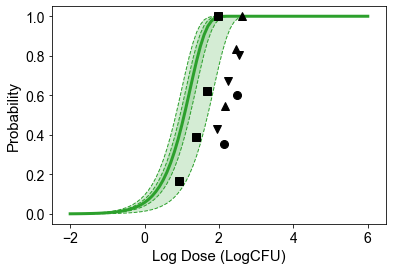

In [69]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_48_quantile[:,1], P_invasion_48_quantile[:,5], facecolor=Palette[2], alpha=0.2)
plt.plot(logdose, P_invasion_48_quantile[:,1], lw=1, color=Palette[2],linestyle='--')
plt.plot(logdose, P_invasion_48_quantile[:,5], lw=1, color=Palette[2],linestyle='--')


plt.fill_between(logdose, P_invasion_48_quantile[:,2], P_invasion_48_quantile[:,4], facecolor=Palette[2], alpha=0.2)
plt.plot(logdose, P_invasion_48_quantile[:,2], lw=1, color=Palette[2],linestyle='--')
plt.plot(logdose, P_invasion_48_quantile[:,4], lw=1, color=Palette[2],linestyle='--')


plt.plot(logdose, P_invasion_48_quantile[:,3], lw=3, color=Palette[2], label="RIMD 0366048")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [70]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

0.9634537355696281

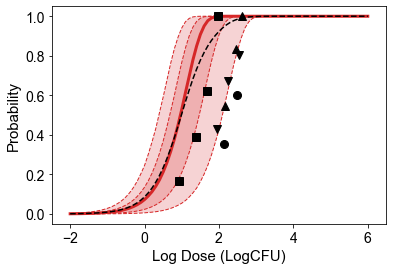

In [71]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_quantile[:,1], P_invasion_quantile[:,5], facecolor=Palette[3], alpha=0.2)
plt.plot(logdose, P_invasion_quantile[:,1], lw=1, color=Palette[3],linestyle='--')
plt.plot(logdose, P_invasion_quantile[:,5], lw=1, color=Palette[3],linestyle='--')


plt.fill_between(logdose, P_invasion_quantile[:,2], P_invasion_quantile[:,4], facecolor=Palette[3], alpha=0.2)
plt.plot(logdose, P_invasion_quantile[:,2], lw=1, color=Palette[3],linestyle='--')
plt.plot(logdose, P_invasion_quantile[:,4], lw=1, color=Palette[3],linestyle='--')


plt.plot(logdose, P_invasion_quantile[:,3], lw=3, color=Palette[3], label="Total of isolations")


plt.plot(logdose, P_invasion_mean[:], lw=1.5, color="black", label="Total of isolations",linestyle='--')


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [72]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

0.9634537355696281

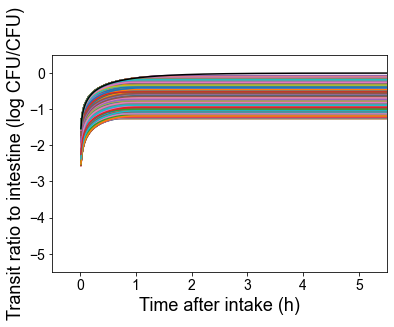

In [73]:
Ni_list = []
Ni_27_list = []
Ni_42_list = []
Ni_48_list = []

Palette=sns.color_palette(n_colors = rep_eat)

plt.rcParams["font.family"] = "Arial"

rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)

for q in tqdm(range(rep_eat),desc='Progress', leave=False):
    
    Ni = np.zeros((len(x), 1), dtype=float)
    dNi = []
    Ni_t = 0
    Ni_27 = np.zeros((len(x), 1), dtype=float)
    dNi_27 = []
    Ni_27_t = 0
    Ni_42 = np.zeros((len(x), 1), dtype=float)
    dNi_42 = []
    Ni_42_t = 0
    Ni_48 = np.zeros((len(x), 1), dtype=float)
    dNi_48 = []
    Ni_48_t = 0
    
    Total = np.zeros((len(x), 1), dtype=float)
    dTotal = []
    Total_t = 0
    
    logSg_using = logSg0_list[:, q]
    logSg_27_using = logSg0_27_list[:, q]
    logSg_42_using = logSg0_42_list[:, q]
    logSg_48_using = logSg0_48_list[:, q]
    
    rcn_gastric_retention = random.choice(range(len(samples_Liquid_retention["alpha"])))
    rcn_gastric_retention_list[q, 0] = rcn_gastric_retention
    alpha = samples_Liquid_retention["alpha"][rcn_gastric_retention]
    beta = samples_Liquid_retention["beta"][rcn_gastric_retention]
    
    
    
    for i in range(len(x)):
        if i == 0:
            Ni[i, 0] = 0
            Ni_27[i, 0] = 0
            Ni_42[i, 0] = 0
            Ni_48[i, 0] = 0
        else:
            Sg = 10**logSg_using[i]
            Sg_27 = 10**logSg_27_using[i]
            Sg_42 = 10**logSg_42_using[i]
            Sg_48 = 10**logSg_48_using[i]
        
            dNi = Sg*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_t = Ni_t + dNi
            Ni[i, 0] = Ni_t
        
            dNi_27 = Sg_27*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_27_t = Ni_27_t + dNi_27
            Ni_27[i, 0] = Ni_27_t
        
            dNi_42 = Sg_42*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_42_t = Ni_42_t + dNi_42
            Ni_42[i, 0] = Ni_42_t

            dNi_48 = Sg_48*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_48_t = Ni_48_t + dNi_48
            Ni_48[i, 0] = Ni_48_t

            dTotal = gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Total_t = Total_t + dTotal
            Total[i, 0] = Total_t

    plt.plot(x[:,0], np.log10(Ni[:,0]), marker="", color=Palette[q])

    
    if q == 0:
        Ni_list = Ni
        Ni_27_list = Ni_27
        Ni_42_list = Ni_42
        Ni_48_list = Ni_48
    else:
        Ni_list = np.concatenate([Ni_list, Ni], axis = -1) 
        Ni_27_list = np.concatenate([Ni_27_list, Ni_27], axis = -1) 
        Ni_42_list = np.concatenate([Ni_42_list, Ni_42], axis = -1) 
        Ni_48_list = np.concatenate([Ni_48_list, Ni_48], axis = -1) 
    
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)

plt.plot(x[:,0], np.log10(Total[:,0]), marker="", color='black')

plt.ylabel("Transit ratio to intestine (log CFU/CFU)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.show()

In [74]:
with open('Ni_Liquid_elder.pkl', 'wb') as f:

    pickle.dump(Ni_list, f)

In [75]:
Ni_quantile = np.zeros((len(Ni_list[:,0]), 3), dtype=float)
Ni_27_quantile = np.zeros((len(Ni_27_list[:,0]), 3), dtype=float)
Ni_42_quantile = np.zeros((len(Ni_42_list[:,0]), 3), dtype=float)
Ni_48_quantile = np.zeros((len(Ni_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(Ni_list[:,0])),desc='Progress', leave=False):
    Ni_quantile[n,:] =  np.quantile(Ni_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_27_quantile[n,:] =  np.quantile(Ni_27_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_42_quantile[n,:] =  np.quantile(Ni_42_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_48_quantile[n,:] =  np.quantile(Ni_48_list[n,:],[ 0.05, 0.5, 0.95])

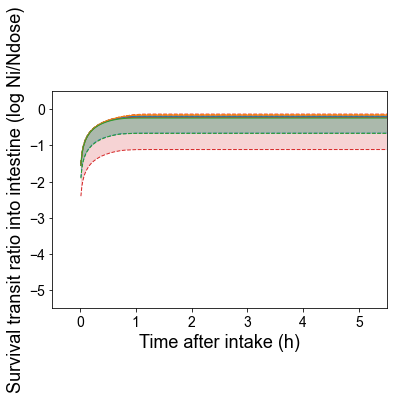

In [76]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0], np.log10(Ni_quantile[:,0]), np.log10(Ni_quantile[:,2]), facecolor=Palette[3], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_27_quantile[:,0]), np.log10(Ni_27_quantile[:,2]), facecolor=Palette[0], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_42_quantile[:,0]), np.log10(Ni_42_quantile[:,2]), facecolor=Palette[1], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_48_quantile[:,0]), np.log10(Ni_48_quantile[:,2]), facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], np.log10(Ni_quantile[:,2]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,2]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,2]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,2]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_quantile[:,0]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,0]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,0]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,0]), lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0], np.log10(Ni_quantile[:,1]), lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,1]), lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,1]), lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,1]), lw=1, color=Palette[2], label="Survival ratio")



plt.ylabel("Survival transit ratio into intestine (log Ni/Ndose)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

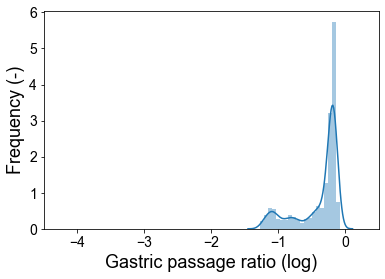

In [77]:
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)
sns.distplot(np.log10(Ni_list)[-1,:])
plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Gastric passage ratio (log)",size=18,fontname="Arial")
plt.xlim(-4.5, 0.5)
plt.show()

In [78]:
V = 319
Ni_min = Ni_list
Ni_27_min = Ni_27_list
Ni_42_min = Ni_42_list
Ni_48_min = Ni_48_list

Nc_min_mean = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

logdose = np.arange(-2, 6+1/10, 1/10, dtype="float")

S = 32*10**4

P_invasion_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_mean = np.zeros((len(logdose),1), dtype=float)
ratio_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_27_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_27_mean = np.zeros((len(logdose),1), dtype=float)
ratio_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_42_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_42_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_42_mean = np.zeros((len(logdose),1), dtype=float)

P_invasion_48_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_48_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_48_mean = np.zeros((len(logdose),1), dtype=float)


In [79]:
for n in tqdm(range(len(logdose)) ,desc='Progress', leave=False):
    warnings.simplefilter('ignore', RuntimeWarning)
    for k in tqdm(range(len(Ni_min[0, :])),desc='Progress', leave=False):

        rcn = random.randrange(len(samples_27["LogNmax"]))
        
        LogNmax_27 = samples_27["LogNmax"][rcn]
        Logmu_27 = samples_27["Logmu"][rcn]
        Nmax_27 = 10**LogNmax_27
        mu_27 = 10**Logmu_27

        LogNmax_42 = samples_42["LogNmax"][rcn]
        Logmu_42 = samples_42["Logmu"][rcn]
        Nmax_42 = 10**LogNmax_42
        mu_42 = 10**Logmu_42

        LogNmax_48 = samples_48["LogNmax"][rcn]
        Logmu_48 = samples_48["Logmu"][rcn]
        Nmax_48 = 10**LogNmax_48
        mu_48 = 10**Logmu_48
        
        Nmax= random.choice([Nmax_27, Nmax_42, Nmax_48])
        mu = random.choice([mu_27, mu_42, mu_48])

        for i in range(len(Ni_min[:, 0])):
        
            Ni = Ni_min[i, k]*10**logdose[n]
            Ni_27 = Ni_27_min[i, k]*10**logdose[n]
            Ni_42 = Ni_42_min[i, k]*10**logdose[n]
            Ni_48 = Ni_48_min[i, k]*10**logdose[n]
            
            T = i/60
            h = 1/60
    
            def ODE_all (y, t):
                return mu_27*(Ni-y)*(S*Nmax - y)/V
    
            def ODE_27 (y, t):
                return mu_27*(Ni_27-y)*(S*Nmax_27 - y)/V

            def ODE_42 (y, t):
                return mu_42*(Ni_42-y)*(S*Nmax_42 - y)/V

            def ODE_48 (y, t):
                return mu_48*(Ni_48-y)*(S*Nmax_48 - y)/V
    
            if i==0:
                Nc_min[i, k] = 0
                Nc_min_27[i, k] = 0
                Nc_min_42[i, k] = 0
                Nc_min_48[i, k] = 0
                
            else:
                
                Nc_min_mean[i, k] = rk4 ( Nc_min_mean[i-1, k], h, T-h, ODE_all)[0]
                Nc_min[i, k] = Nc_min_mean[i, k]
                
                Nc_min_mean_27[i, k] = rk4 ( Nc_min_mean_27[i-1, k], h, T-h, ODE_27)[0]
                Nc_min_27[i, k] = Nc_min_mean_27[i, k]
        
                Nc_min_mean_42[i, k] = rk4 ( Nc_min_mean_42[i-1, k], h, T-h, ODE_42)[0]
                Nc_min_42[i, k] = Nc_min_mean_42[i, k]
        
                Nc_min_mean_48[i, k] = rk4 ( Nc_min_mean_48[i-1, k], h, T-h, ODE_48)[0]
                Nc_min_48[i, k] = Nc_min_mean_48[i, k]

        
        rcn = random.choice(range(len(samples_Colonic_filling["alpha"])))
        t = int(round(np.random.gamma(samples_Colonic_filling["alpha"][rcn],
                                        1/samples_Colonic_filling["beta"][rcn])))
        t = np.min((t,len(Ni_min[:, 0])-1))

        ratio = Nc_min[t,k]/10**logdose[n] 
        P_invasion =  1- (1-ratio)**(10**logdose[n])
        P_invasion_mcmc[n,k] = P_invasion

        ratio_27 = Nc_min_27[t,k]/10**logdose[n] 
        P_invasion_27 =  1- (1-ratio_27)**(10**logdose[n])
        P_invasion_27_mcmc[n,k] = P_invasion_27
        
        ratio_42 = Nc_min_42[t,k]/10**logdose[n] 
        P_invasion_42 =  1- (1-ratio_42)**(10**logdose[n])
        P_invasion_42_mcmc[n,k] = P_invasion_42
        
        ratio_48 = Nc_min_48[t,k]/10**logdose[n]    
        P_invasion_48 =  1- (1-ratio_48)**(10**logdose[n])
        P_invasion_48_mcmc[n,k] = P_invasion_48
        
        
    P_invasion_quantile[n,:] =  np.quantile(P_invasion_mcmc[n,:][np.invert(np.isnan(P_invasion_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_mean[n,:] =  np.mean(P_invasion_mcmc[n,:][np.invert(np.isinf(P_invasion_mcmc[n,:])|np.isnan(P_invasion_mcmc[n,:]))])
    
    P_invasion_27_quantile[n,:] =  np.quantile(P_invasion_27_mcmc[n,:][np.invert(np.isnan(P_invasion_27_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_27_mean[n,:] =  np.mean(P_invasion_27_mcmc[n,:][np.invert(np.isinf(P_invasion_27_mcmc[n,:])|np.isnan(P_invasion_27_mcmc[n,:]))])
    
    P_invasion_42_quantile[n,:] =  np.quantile(P_invasion_42_mcmc[n,:][np.invert(np.isnan(P_invasion_42_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_42_mean[n,:] =  np.mean(P_invasion_42_mcmc[n,:][np.invert(np.isinf(P_invasion_42_mcmc[n,:])|np.isnan(P_invasion_42_mcmc[n,:]))])
    
    P_invasion_48_quantile[n,:] =  np.quantile(P_invasion_48_mcmc[n,:][np.invert(np.isnan(P_invasion_48_mcmc[n,:]))],[0.005, 0.025, 0.20, 0.5, 0.80, 0.975, 0.995])
    P_invasion_48_mean[n,:] =  np.mean(P_invasion_48_mcmc[n,:][np.invert(np.isinf(P_invasion_48_mcmc[n,:])|np.isnan(P_invasion_48_mcmc[n,:]))])

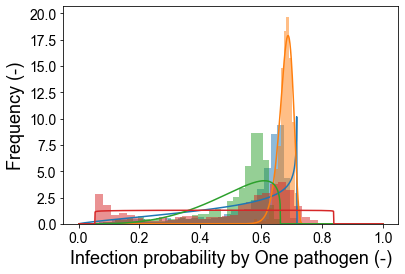

In [80]:
from scipy.stats import beta
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)


plt.hist(Nc_min_27[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[0], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_27[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[0])


plt.hist(Nc_min_42[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[1], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_42[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[1])


plt.hist(Nc_min_48[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[2], alpha = 0.5)
fit_parameter = beta.fit(Nc_min_48[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[2])


plt.hist(Nc_min[t,:]/10**logdose[n], density=T, bins = 30, color=Palette[3], alpha = 0.5)
fit_parameter = beta.fit(Nc_min[t,:]/10**logdose[n])
frozen_beta = beta.freeze(*fit_parameter)
plt.plot(x[1:]/15, frozen_beta.pdf(x[1:]/15), color=Palette[3])



plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Infection probability by One pathogen (-)",size=18,fontname="Arial")
plt.xlim(-0.05, 1.05)
plt.show()

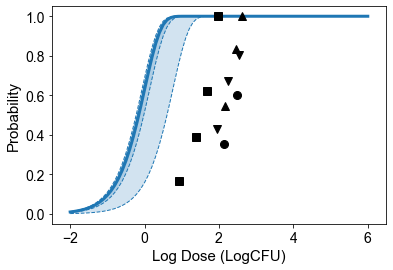

In [81]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_27_quantile[:,1], P_invasion_27_quantile[:,5], facecolor=Palette[0], alpha=0.2)
plt.plot(logdose, P_invasion_27_quantile[:,1], lw=1, color=Palette[0],linestyle='--')
plt.plot(logdose, P_invasion_27_quantile[:,5], lw=1, color=Palette[0],linestyle='--')


plt.fill_between(logdose, P_invasion_27_quantile[:,2], P_invasion_27_quantile[:,4], facecolor=Palette[0], alpha=0.2)
plt.plot(logdose, P_invasion_27_quantile[:,2], lw=1, color=Palette[0],linestyle='--')
plt.plot(logdose, P_invasion_27_quantile[:,4], lw=1, color=Palette[0],linestyle='--')


plt.plot(logdose, P_invasion_27_quantile[:,3], lw=3, color=Palette[0], label="RIMD 0366027")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [82]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

2.006553141205851

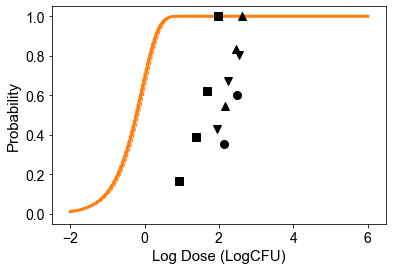

In [83]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_42_quantile[:,1], P_invasion_42_quantile[:,5], facecolor=Palette[1], alpha=0.2)
plt.plot(logdose, P_invasion_42_quantile[:,1], lw=1, color=Palette[1],linestyle='--')
plt.plot(logdose, P_invasion_42_quantile[:,5], lw=1, color=Palette[1],linestyle='--')


plt.fill_between(logdose, P_invasion_42_quantile[:,2], P_invasion_42_quantile[:,4], facecolor=Palette[1], alpha=0.2)
plt.plot(logdose, P_invasion_42_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(logdose, P_invasion_42_quantile[:,4], lw=1, color=Palette[1],linestyle='--')


plt.plot(logdose, P_invasion_42_quantile[:,3], lw=3, color=Palette[1], label="RIMD 0366042")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [84]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

2.006553141205851

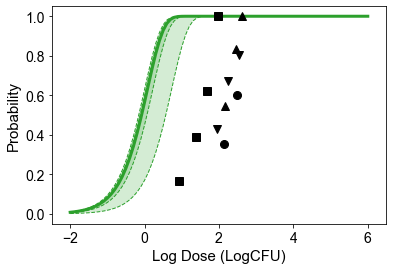

In [85]:
plt.figure()
plt.rcParams["font.family"] = "Arial"

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_48_quantile[:,1], P_invasion_48_quantile[:,5], facecolor=Palette[2], alpha=0.2)
plt.plot(logdose, P_invasion_48_quantile[:,1], lw=1, color=Palette[2],linestyle='--')
plt.plot(logdose, P_invasion_48_quantile[:,5], lw=1, color=Palette[2],linestyle='--')


plt.fill_between(logdose, P_invasion_48_quantile[:,2], P_invasion_48_quantile[:,4], facecolor=Palette[2], alpha=0.2)
plt.plot(logdose, P_invasion_48_quantile[:,2], lw=1, color=Palette[2],linestyle='--')
plt.plot(logdose, P_invasion_48_quantile[:,4], lw=1, color=Palette[2],linestyle='--')


plt.plot(logdose, P_invasion_48_quantile[:,3], lw=3, color=Palette[2], label="RIMD 0366048")


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [86]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

2.006553141205851

In [87]:
P_invasion_quantile

array([[5.95481180e-04, 6.83580549e-04, 2.27838179e-03, 8.93342838e-03,
        1.12770345e-02, 1.35310724e-02, 1.48508081e-02],
       [7.47552138e-04, 8.60500752e-04, 2.92435618e-03, 1.12335950e-02,
        1.41812266e-02, 1.70400553e-02, 1.86599796e-02],
       [9.41021284e-04, 1.08318555e-03, 3.68015146e-03, 1.41669542e-02,
        1.78068898e-02, 2.14046334e-02, 2.34343671e-02],
       [1.18778908e-03, 1.36801496e-03, 4.63082677e-03, 1.78753382e-02,
        2.23743706e-02, 2.68717660e-02, 2.94122700e-02],
       [1.49510622e-03, 1.72191793e-03, 5.76114976e-03, 2.22464810e-02,
        2.80856165e-02, 3.36417872e-02, 3.68822478e-02],
       [1.88129764e-03, 2.16729007e-03, 7.32896076e-03, 2.81451883e-02,
        3.52785141e-02, 4.22243695e-02, 4.62126934e-02],
       [2.36854995e-03, 2.72769058e-03, 9.21842116e-03, 3.53035758e-02,
        4.41294397e-02, 5.27915965e-02, 5.77149638e-02],
       [2.98091284e-03, 3.42132385e-03, 1.15679456e-02, 4.42020525e-02,
        5.52744495e-02, 6

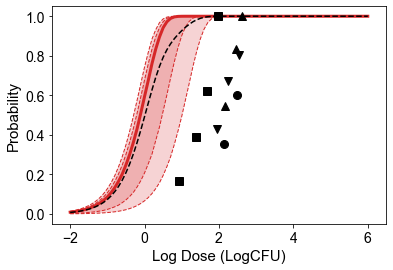

In [88]:
plt.figure()
plt.rcParams["font.family"] = "Arial"
Palette=sns.color_palette(n_colors=4)

pdf = PdfPages("Probability of C. jejuni invading.pdf")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Log Dose (LogCFU)",size=15,fontname="Arial")
plt.ylabel("Probability",size=15,fontname="Arial")
plt.xticks(np.arange(-4, 7, 2))
plt.ylim([-0.05,1.05])
plt.xlim([-2.5,6.5])


plt.fill_between(logdose, P_invasion_quantile[:,1], P_invasion_quantile[:,5], facecolor=Palette[3], alpha=0.2)
plt.plot(logdose, P_invasion_quantile[:,1], lw=1, color=Palette[3],linestyle='--')
plt.plot(logdose, P_invasion_quantile[:,5], lw=1, color=Palette[3],linestyle='--')


plt.fill_between(logdose, P_invasion_quantile[:,2], P_invasion_quantile[:,4], facecolor=Palette[3], alpha=0.2)
plt.plot(logdose, P_invasion_quantile[:,2], lw=1, color=Palette[3],linestyle='--')
plt.plot(logdose, P_invasion_quantile[:,4], lw=1, color=Palette[3],linestyle='--')


plt.plot(logdose, P_invasion_quantile[:,3], lw=3, color=Palette[3], label="Total of isolations")


plt.plot(logdose, P_invasion_mean[:], lw=1.5, color="black", label="Total of isolations",linestyle='--')


data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="s", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="v", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="o", linestyle="none", markersize=8)

data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
plt.plot(data.Dose,data.Prob_ill,color="black", marker="^", linestyle="none", markersize=8)

plt.show()

In [89]:
idx = []
data = pd.read_csv('../../Cell Invasion/ill prob Evan 1996.csv') 
Prob_ill_list = data
data = pd.read_csv('../../Cell Invasion/ill prob Brandhof 2003.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Korlath 1985.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
data = pd.read_csv('../../Cell Invasion/ill prob Blaser 1987.csv') 
Prob_ill_list = pd.concat([Prob_ill_list, data]) 
Prob_ill_list = Prob_ill_list[Prob_ill_list.Prob_ill<1]
Prob_ill_list = Prob_ill_list.reset_index()

for i in range(len(Prob_ill_list.Prob_ill)):
    idx.append(np.abs(np.asarray(P_invasion_quantile[:,3]) - Prob_ill_list.Prob_ill[i]).argmin())
(np.sum(((logdose[idx]-Prob_ill_list.Dose)**2))/len(Prob_ill_list.Dose))**0.5

2.006553141205851